In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

# Step :1 read date column as date time datatype

In [12]:
dfconfirmIndia=pd.read_csv('/content/IndiaALL.csv' ,parse_dates=['Date'],  index_col=['Date'])


dfconfirmBangladesh=pd.read_csv('/content/bangladeshAll.csv' ,parse_dates=['Date'],  index_col=['Date'])


dfconfirmJapan=pd.read_csv('/content/JapanAll.csv' ,parse_dates=['Date'],  index_col=['Date'])

dfconfirmFrance=pd.read_csv('/content/FranceAll.csv' ,parse_dates=['Date'],  index_col=['Date'])


dfconfirmGermany=pd.read_csv('/content/GermanyAll.csv',parse_dates=['Date'],  index_col=['Date'] )

dfconfirmItaly=pd.read_csv('/content/ItalyAll.csv',parse_dates=['Date'],  index_col=['Date'] )


dfconfirmNewzeland=pd.read_csv('/content/NewZelandAll.csv',parse_dates=['Date'],  index_col=['Date'] )


dfconfirmPakistan=pd.read_csv('/content/PakistanAll.csv',parse_dates=['Date'],  index_col=['Date'])



**Death Cases**

In [13]:
dfDeathIndia=pd.read_csv('/content/IndiaALL.csv' ,parse_dates=['Date'],  index_col=['Date'])


dfDeathBangladesh=pd.read_csv('/content/bangladeshAll.csv' ,parse_dates=['Date'],  index_col=['Date'])


dfDeathJapan=pd.read_csv('/content/JapanAll.csv' ,parse_dates=['Date'],  index_col=['Date'])


dfDeathFrance=pd.read_csv('/content/FranceAll.csv' ,parse_dates=['Date'],  index_col=['Date'])

dfDeathGermany=pd.read_csv('/content/GermanyAll.csv' ,parse_dates=['Date'],  index_col=['Date'])

dfDeathItaly=pd.read_csv('/content/ItalyAll.csv' ,parse_dates=['Date'],  index_col=['Date'])


dfDeathNewzeland=pd.read_csv('/content/NewZelandAll.csv',parse_dates=['Date'],  index_col=['Date'] )


dfDeathPakistan=pd.read_csv('/content/PakistanAll.csv',parse_dates=['Date'],  index_col=['Date'])




In [14]:
def Confirem(df,str,p,d,q):
  #df['Confirmed'] = df['Confirmed'].astype(float)
  df=df.drop(['C','D','Death'],axis=1)
  split_date = '31-Oct-2022'
  df.drop(df.loc[df.index > split_date].index, inplace = True)
  df=df.dropna()
  df=df.groupby('Date').sum()
  df.plot()
  split_date = '31-Aug-2022'
  train = df.loc[df.index <= split_date].copy()
  test = df.loc[df.index > split_date].copy()
  
  #train=df[:250] 
  #test=df[250:] 
  model= ARIMA(train, order=(p,d,q)).fit()
  pred= model.predict(start=len(train), end= len(df)-1)
  predfull= model.predict(start=1, end= len(df)) #predect on full data
  predtest= model.predict(start=len(train), end= len(df)-1)  #predect on test data
  


  print('MAE:', mean_absolute_error(test,pred))
  print('MSE:',mean_squared_error(test,pred))
  print(' RMSE:',mean_squared_error(test,pred, squared=False))  
  print(" R2 Score:",r2_score(test,pred))

  print('f MAE:', mean_absolute_error(df,predfull))
  print('f MSE:',mean_squared_error(df,predfull))
  print('f RMSE:',mean_squared_error(df,predfull, squared=False))
  print("f R2 Score:",r2_score(df,predfull))
  
  df.Confirmed.mean(), np.sqrt(df.Confirmed.var())
  final_model=ARIMA(df, order=(p,d,q)).fit()
  predfuture=final_model.predict(start=len(df), end= len(df)+20) #forcast future

  
  style.use('fivethirtyeight')
  plt.figure(figsize=(16, 9))

  train['Confirmed'].plot(legend=True)
  test['Confirmed'].plot(legend=True)

  pred.plot(legend=True)
  

  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Connfirmed Cases', size=30)
  plt.legend(['Train Case','Test Case', 'ARIMA Prediction'], prop={'size': 20})

  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  plt.show()
  print('\n')
  print('\n')
  print('\n')

 
  plt.figure(figsize=(16, 9))
  df['Confirmed'].plot(legend=True, label='Train')
  #test['Confirmed'].plot(legend=True, label='Test')

  predfull.plot(legend=True, label='predicted_test')

  
  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Connfirmed Cases', size=30)
  plt.legend(['Total Confirmed Case', 'ARIMA Prediction from the beginning'], prop={'size': 20})
  
  l=[]
  x=range(0,350000,50000)
  l=list(x)


  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  plt.show()
  

  plt.figure(figsize=(16, 9))
  df['Confirmed'].plot(legend=True, label='Confirmed')
  predfuture.plot(legend=True, label='prediction')
  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Connfirmed Cases', size=30)
  plt.legend(['Total Confirmed Case', 'ARIMA Forecast'], prop={'size': 20})

  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  plt.show()
  predtest=pd.DataFrame({'Date':predtest.index, 'predict':predtest.values})
  
  predtest['predict']=predtest['predict'].abs().round().astype('int')
  predfuture=pd.DataFrame({'Date':predfuture.index, 'Future predict':predfuture.values})
  predfuture['Future predict']=predfuture['Future predict'].abs().round()
  
  
  return test, predtest, predfuture




In [15]:
def Death(df,str,p,d,q):
 # df['Death'] = df['Death'].astype(float)
  split_date = '31-Oct-2022'
  df.drop(df.loc[df.index > split_date].index, inplace = True)
  df=df.drop(['C','D','Confirmed'],axis=1)
  df=df.dropna()
  df=df.groupby('Date').sum()
  #df.plot()
  
  split_date = '31-Aug-2022'
  train = df.loc[df.index <= split_date].copy()
  test = df.loc[df.index > split_date].copy()
  
  model= ARIMA(train, order=(p,d,q)).fit()
  pred= model.predict(start=len(train), end= len(df)-1)
  predtest= model.predict(start=len(train), end= len(df)-1)
  predfull= model.predict(start=1, end= len(df)-1) #predect on full data
  
  style.use('fivethirtyeight')
  plt.figure(figsize=(16, 9))

  train['Death'].plot(legend=True, label='Train')
  test['Death'].plot(legend=True, label='Test')

  pred.plot(legend=True, label='predicted_test')

  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Death Cases', size=30)
  plt.legend(['Train Case','Test Case', 'ARIMA Prediction'], prop={'size': 20})

  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  plt.show()
  print('\n')
  print('\n')
  print('\n')

 
  plt.figure(figsize=(16, 9))
  df['Death'].plot(legend=True)
  #test['Confirmed'].plot(legend=True, label='Test')

  predfull.plot(legend=True)

  #plt.title('Number of Coronavirus Cases Over Time in India', size=30)
  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Death Cases', size=30)
  plt.legend(['Total Death Case', 'ARIMA Prediction from the beginning'], prop={'size': 20})
  
  l=[]
  x=range(0,350000,50000)
  l=list(x)

#plt.yticks([100,200,300,500,1000, 10000,30000, 40000, 50000,80000,120000,150000,200000,250000,300000,350000])
#plt.yticks(l)
  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  plt.show()
  print('MAE:', mean_absolute_error(test,pred))
  print('MSE:',mean_squared_error(test,pred))
  print('RMSE:',mean_squared_error(test,pred, squared=False))
  
  print("R2 Score:",r2_score(test,pred))
  df.Death.mean(), np.sqrt(df.Death.var())
  final_model=ARIMA(df, order=(p,d,q)).fit()
  predfuture=final_model.predict(start=len(df), end= len(df)+20)

  

  plt.figure(figsize=(16, 9))
  df['Death'].plot(legend=True, label='Death')
  predfuture.plot(legend=True, label='Death prediction')
  plt.title(str, size=30)
  plt.xlabel('Days', size=30)
  plt.ylabel('Number of Connfirmed Cases', size=30)
  plt.legend(['Total Death Case', 'ARIMA Forecast'], prop={'size': 20})

  plt.xticks(size=20)
  plt.yticks(size=20)
  plt.grid(True,color='k')
  plt.show()
  predtest=pd.DataFrame({'Date':predtest.index, 'predict':predtest.values})
  predtest['predict']=predtest['predict'].abs().round().astype('int')
  predfuture=pd.DataFrame({'Date':predfuture.index, 'Future predict':predfuture.values})
  predfuture['Future predict']=predfuture['Future predict'].abs().round().astype('int')

  return test, predtest, predfuture




/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

MAE: 2288.9084143294417
MSE: 8902712.392434863
 RMSE: 2983.741341409282
 R2 Score: -1.1291938008989946
f MAE: 31778.599186052987
f MSE: 5866103743.895795
f RMSE: 76590.49382198678
f R2 Score: -0.17562463788119587


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

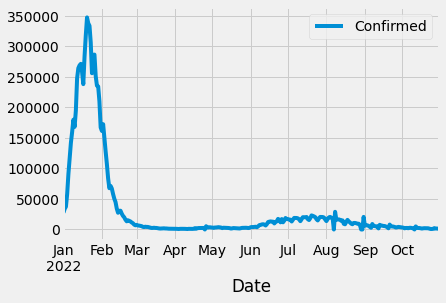

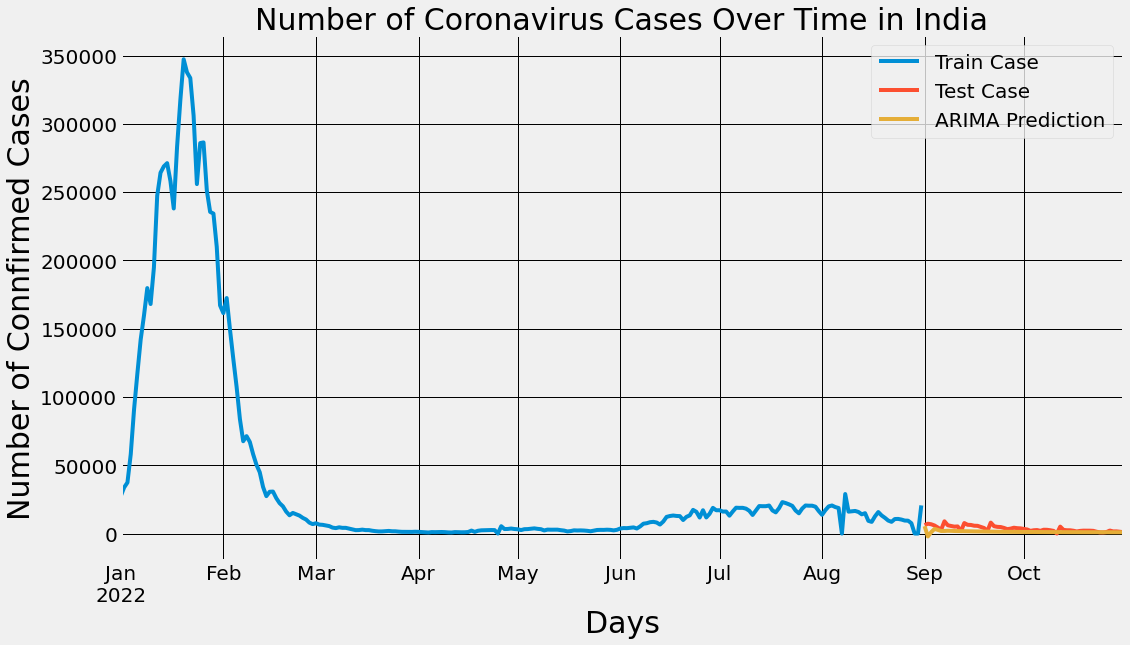

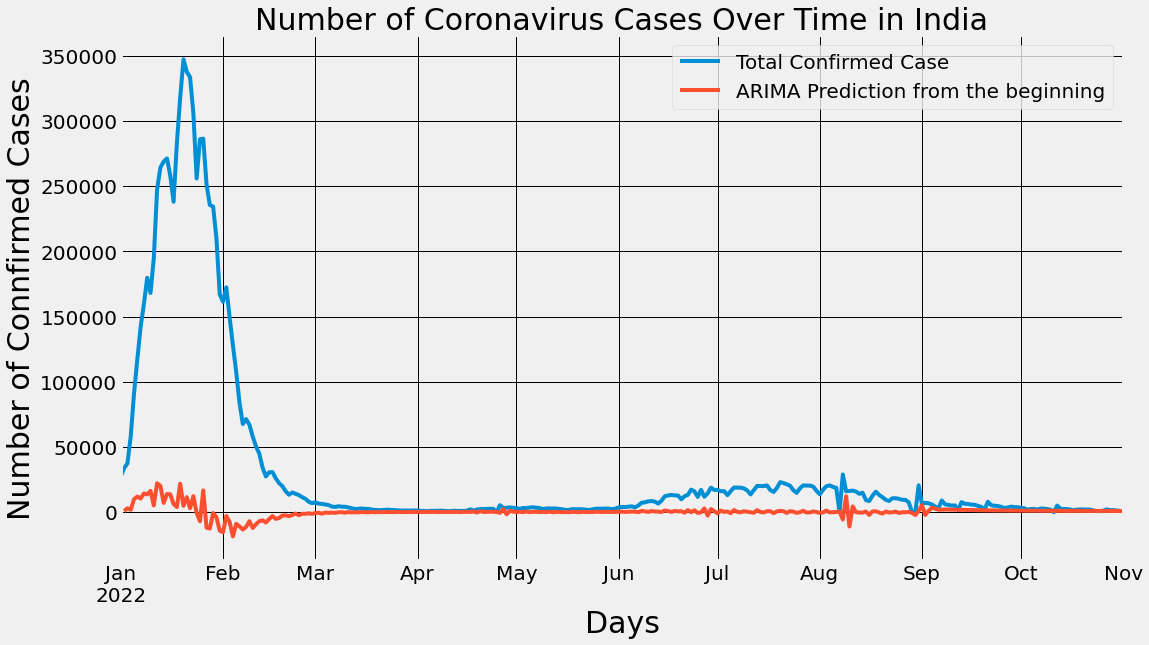

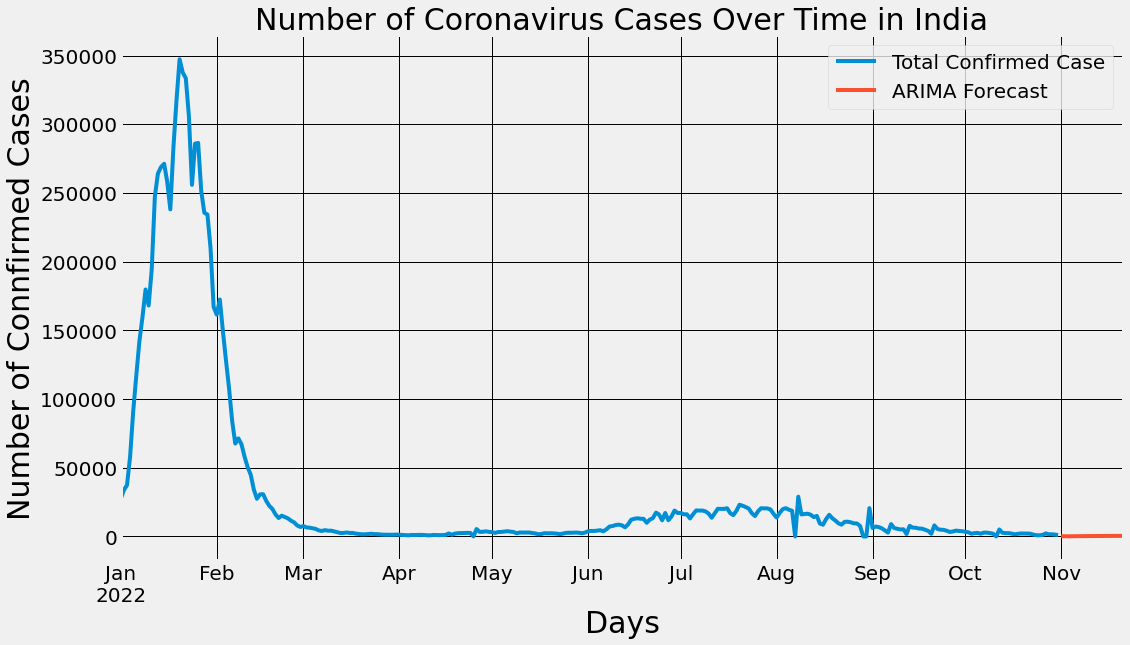

In [16]:
 testcase,predtest_india,predfuture_india=Confirem(dfconfirmIndia,'Number of Coronavirus Cases Over Time in India',3,1,1)

In [17]:
testcase

Confirmed
Date                 
2022-09-01       6168
2022-09-02       7219
2022-09-03       6809
2022-09-04       5910
2022-09-05       4417
...               ...
2022-10-27       2208
2022-10-28       1574
2022-10-29       1594
2022-10-30       1336
2022-10-31       1046

[61 rows x 1 columns]

In [18]:
 predtest_india

Date  predict
0  2022-09-01     5419
1  2022-09-02     2105
2  2022-09-03     1051
3  2022-09-04     3380
4  2022-09-05     2704
..        ...      ...
56 2022-10-27      945
57 2022-10-28      941
58 2022-10-29      937
59 2022-10-30      933
60 2022-10-31      930

[61 rows x 2 columns]

In [19]:
predfuture_india

Date  Future predict
0  2022-11-01           101.0
1  2022-11-02           177.0
2  2022-11-03           117.0
3  2022-11-04           124.0
4  2022-11-05           169.0
5  2022-11-06           199.0
6  2022-11-07           217.0
7  2022-11-08           236.0
8  2022-11-09           256.0
9  2022-11-10           276.0
10 2022-11-11           294.0
11 2022-11-12           310.0
12 2022-11-13           326.0
13 2022-11-14           341.0
14 2022-11-15           356.0
15 2022-11-16           369.0
16 2022-11-17           382.0
17 2022-11-18           394.0
18 2022-11-19           406.0
19 2022-11-20           417.0
20 2022-11-21           427.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

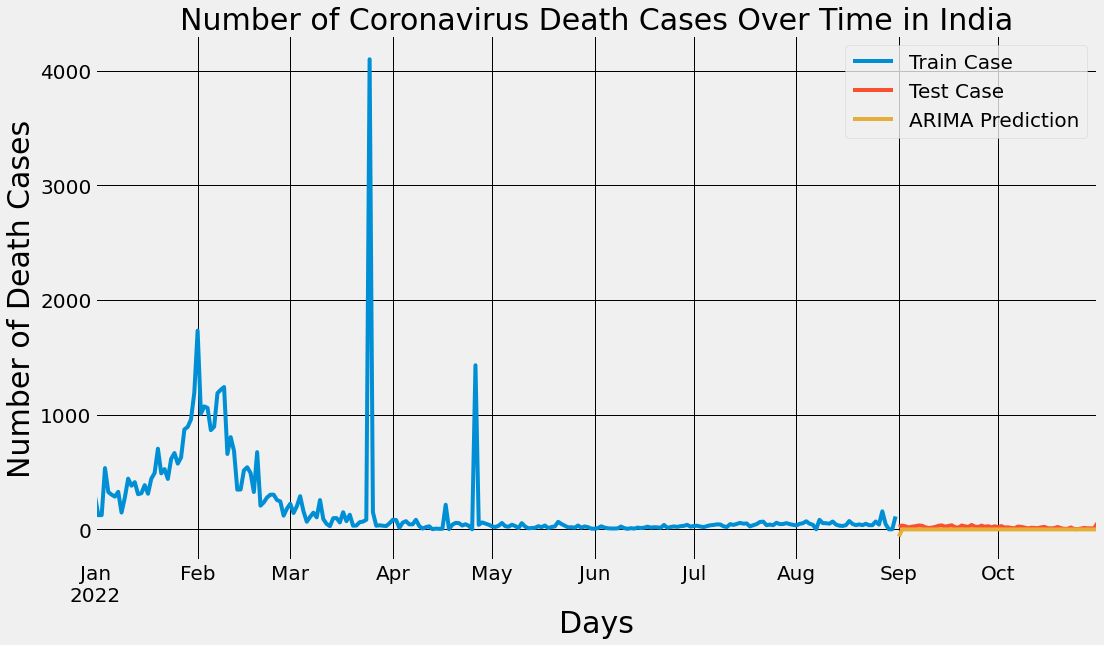

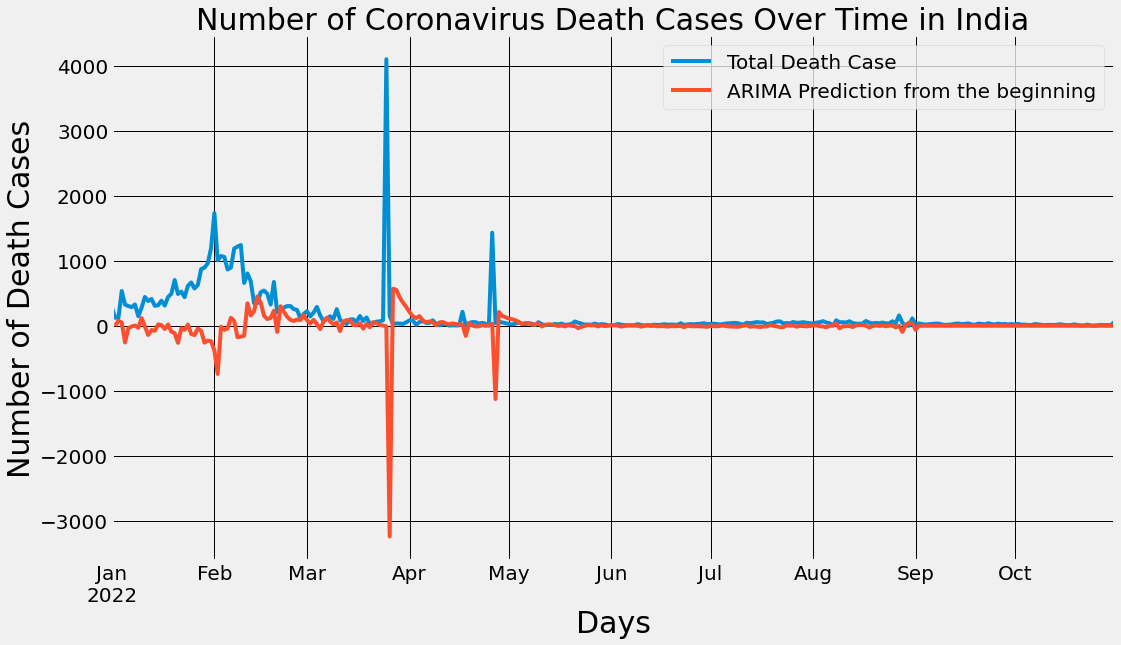

MAE: 21.09160897508014
MSE: 610.1062738330594
RMSE: 24.700329427622204
R2 Score: -5.057176290389478


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

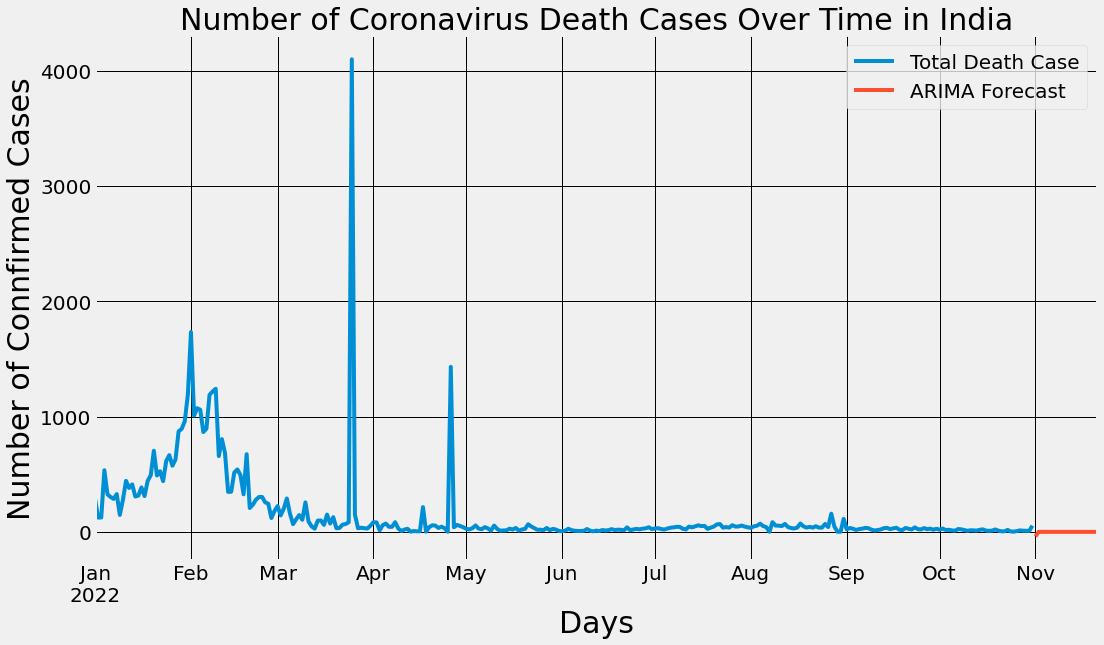

In [20]:
testcase, predtest_indiaDeath,predfuture_indiaDeath=Death(dfDeathIndia,'Number of Coronavirus Death Cases Over Time in India',0,1,1)

In [21]:
testcase

Death
Date             
2022-09-01     21
2022-09-02     33
2022-09-03     26
2022-09-04     16
2022-09-05     23
...           ...
2022-10-27     12
2022-10-28      9
2022-10-29      8
2022-10-30      8
2022-10-31     53

[61 rows x 1 columns]

In [22]:
predtest_indiaDeath

Date  predict
0  2022-09-01       62
1  2022-09-02        1
2  2022-09-03        1
3  2022-09-04        1
4  2022-09-05        1
..        ...      ...
56 2022-10-27        1
57 2022-10-28        1
58 2022-10-29        1
59 2022-10-30        1
60 2022-10-31        1

[61 rows x 2 columns]

In [23]:
predfuture_indiaDeath

Date  Future predict
0  2022-11-01              41
1  2022-11-02               1
2  2022-11-03               1
3  2022-11-04               1
4  2022-11-05               1
5  2022-11-06               1
6  2022-11-07               1
7  2022-11-08               1
8  2022-11-09               1
9  2022-11-10               1
10 2022-11-11               1
11 2022-11-12               1
12 2022-11-13               1
13 2022-11-14               1
14 2022-11-15               1
15 2022-11-16               1
16 2022-11-17               1
17 2022-11-18               1
18 2022-11-19               1
19 2022-11-20               1
20 2022-11-21               1

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

MAE: 381.42305542118714
MSE: 179503.76095329903
 RMSE: 423.6788417578804
 R2 Score: -4.195081144258883
f MAE: 1479.3028269688882
f MSE: 11863896.163284512
f RMSE: 3444.400697259904
f R2 Score: -0.21752523733923645


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

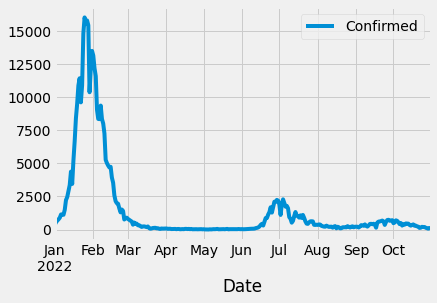

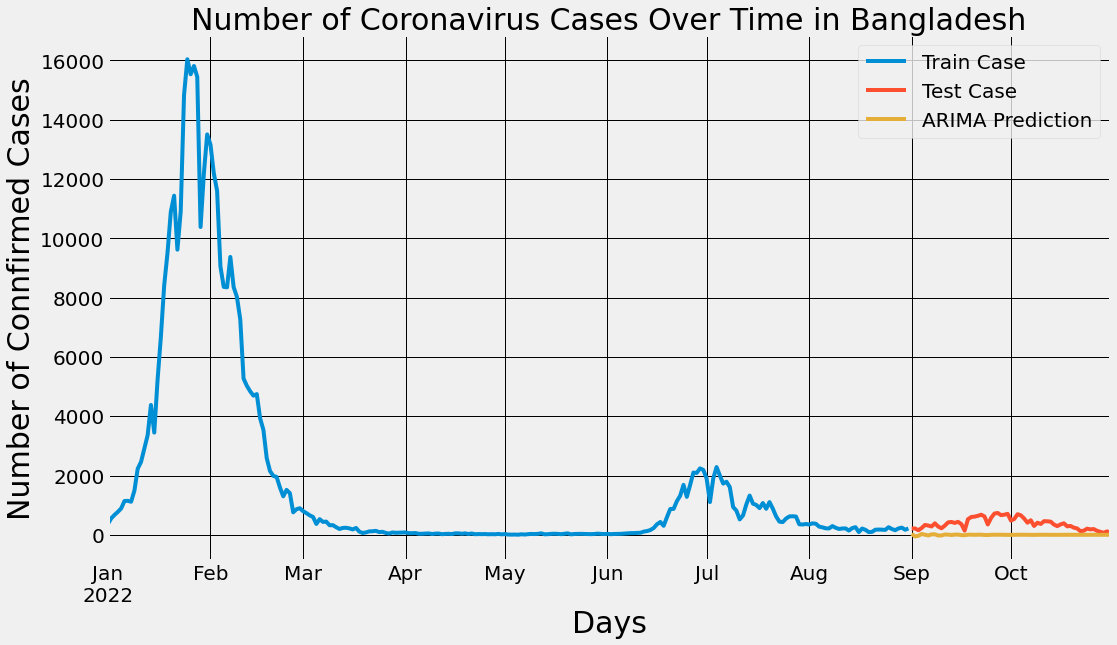

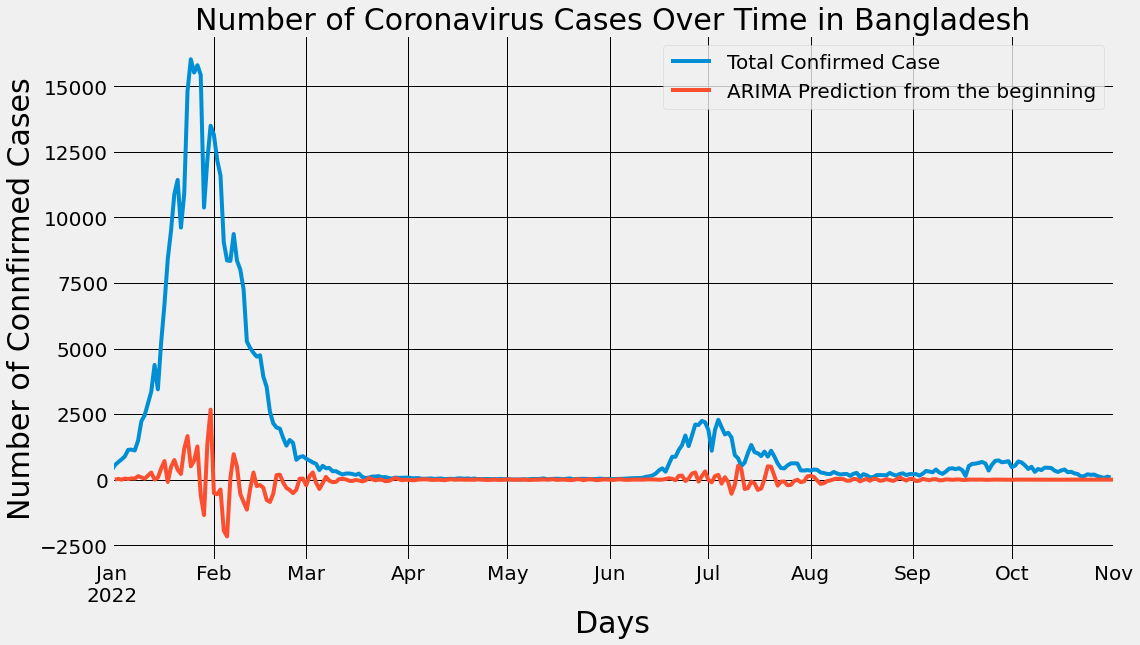

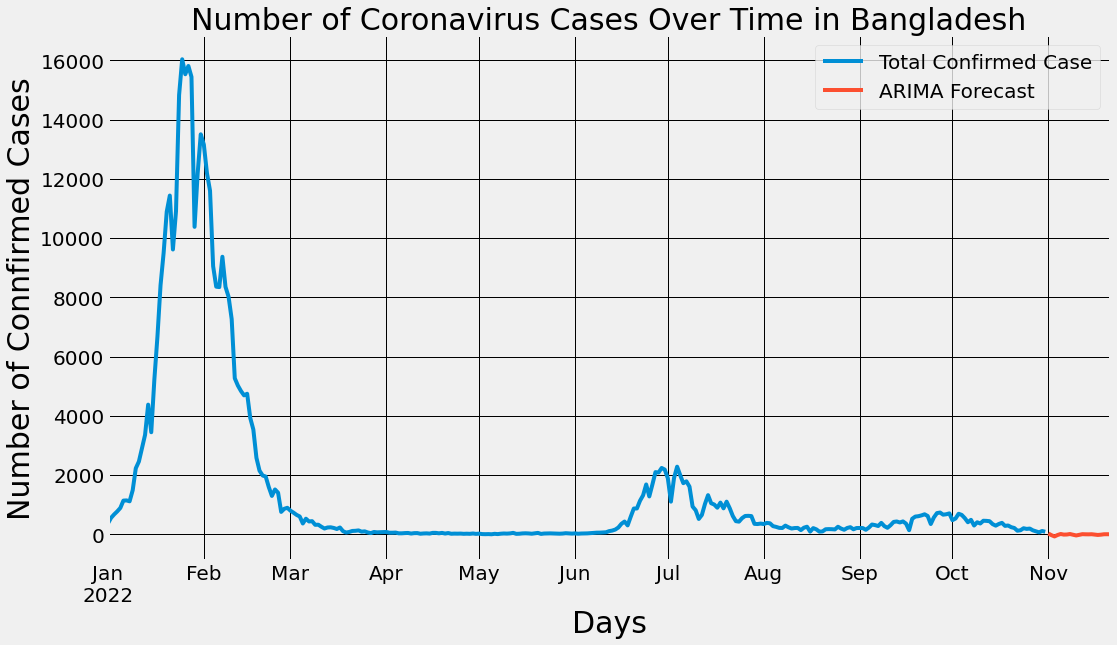

In [24]:
 testcase,predtest_bd,predfuture_bd=Confirem(dfconfirmBangladesh,'Number of Coronavirus Cases Over Time in Bangladesh',5,1,5)

In [25]:
 testcase

Confirmed
Date                 
2022-09-01        216
2022-09-02        214
2022-09-03        155
2022-09-04        230
2022-09-05        333
...               ...
2022-10-27        137
2022-10-28        102
2022-10-29         69
2022-10-30        115
2022-10-31         88

[61 rows x 1 columns]

In [26]:
predtest_bd

Date  predict
0  2022-09-01       36
1  2022-09-02       54
2  2022-09-03       33
3  2022-09-04       29
4  2022-09-05        4
..        ...      ...
56 2022-10-27        1
57 2022-10-28        1
58 2022-10-29        1
59 2022-10-30        1
60 2022-10-31        2

[61 rows x 2 columns]

In [27]:
predfuture_bd

Date  Future predict
0  2022-11-01            30.0
1  2022-11-02            26.0
2  2022-11-03            70.0
3  2022-11-04            20.0
4  2022-11-05            13.0
5  2022-11-06             7.0
6  2022-11-07             4.0
7  2022-11-08            12.0
8  2022-11-09            12.0
9  2022-11-10            36.0
10 2022-11-11            15.0
11 2022-11-12             7.0
12 2022-11-13             3.0
13 2022-11-14             1.0
14 2022-11-15             5.0
15 2022-11-16             7.0
16 2022-11-17            19.0
17 2022-11-18            10.0
18 2022-11-19             4.0
19 2022-11-20             5.0
20 2022-11-21             3.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

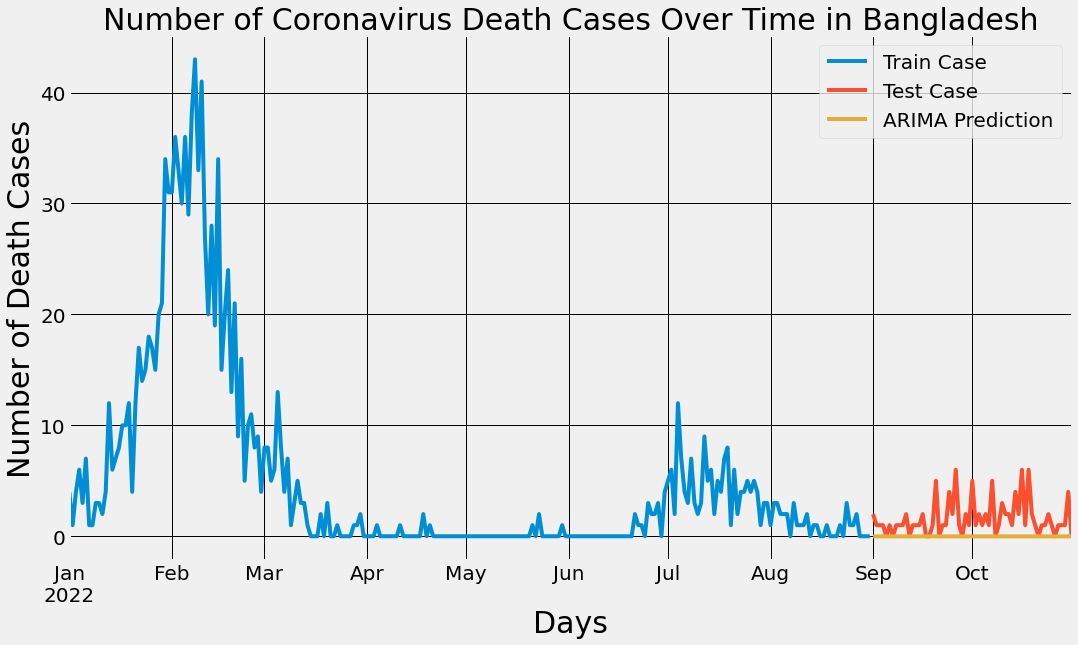

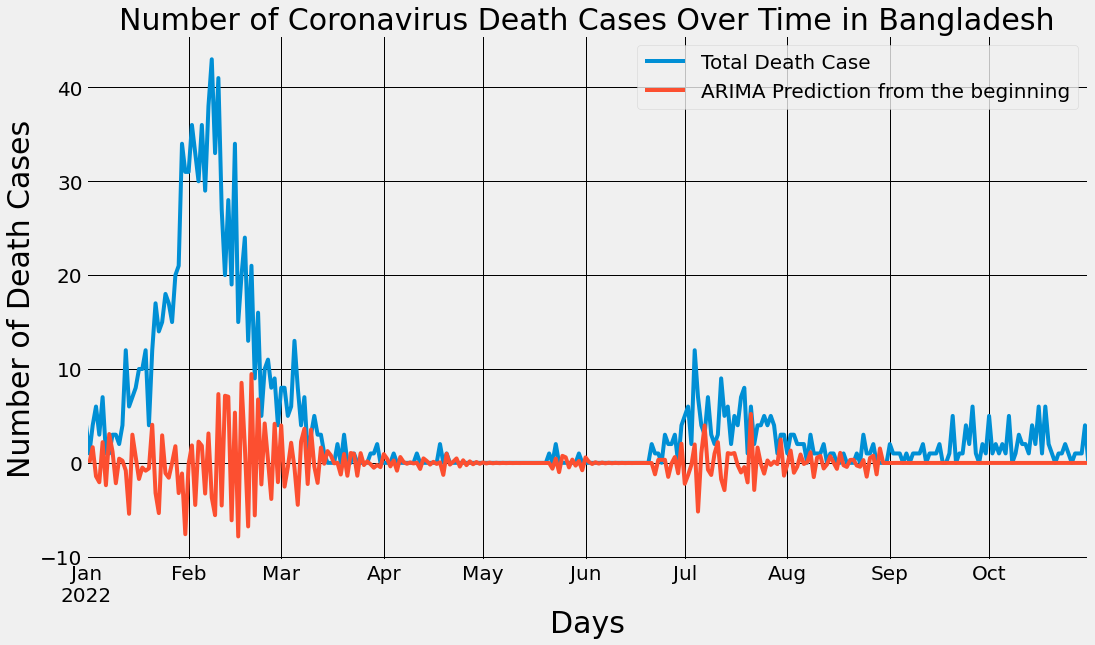

MAE: 1.65041224696245
MSE: 5.217044430993785
RMSE: 2.284085031471855
R2 Score: -1.092779466119865


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

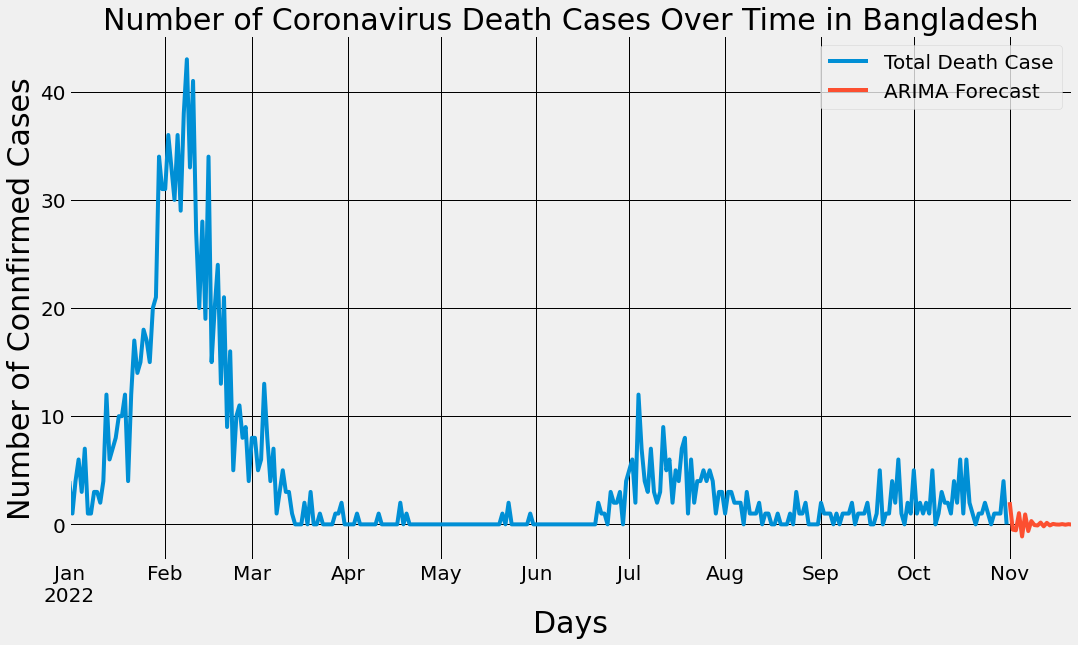

In [28]:
testcase,predtest_bd,predfuture_bd=Death(dfDeathBangladesh,'Number of Coronavirus Death Cases Over Time in Bangladesh',2,1,1)

In [29]:
testcase

Death
Date             
2022-09-01      2
2022-09-02      1
2022-09-03      1
2022-09-04      1
2022-09-05      0
...           ...
2022-10-27      1
2022-10-28      1
2022-10-29      1
2022-10-30      4
2022-10-31      0

[61 rows x 1 columns]

In [30]:
predtest_bd

Date  predict
0  2022-09-01        0
1  2022-09-02        0
2  2022-09-03        0
3  2022-09-04        0
4  2022-09-05        0
..        ...      ...
56 2022-10-27        0
57 2022-10-28        0
58 2022-10-29        0
59 2022-10-30        0
60 2022-10-31        0

[61 rows x 2 columns]

In [31]:
predfuture_bd

Date  Future predict
0  2022-11-01               2
1  2022-11-02               0
2  2022-11-03               1
3  2022-11-04               1
4  2022-11-05               1
5  2022-11-06               1
6  2022-11-07               1
7  2022-11-08               0
8  2022-11-09               0
9  2022-11-10               0
10 2022-11-11               0
11 2022-11-12               0
12 2022-11-13               0
13 2022-11-14               0
14 2022-11-15               0
15 2022-11-16               0
16 2022-11-17               0
17 2022-11-18               0
18 2022-11-19               0
19 2022-11-20               0
20 2022-11-21               0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

MAE: 54531.23548965544
MSE: 4052455448.441918
 RMSE: 63658.899208531075
 R2 Score: -2.8496745938131736
f MAE: 67080.00502365781
f MSE: 8415644217.0566225
f RMSE: 91736.82039975346
f R2 Score: -1.292327038455479


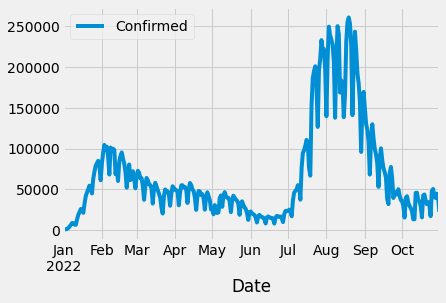

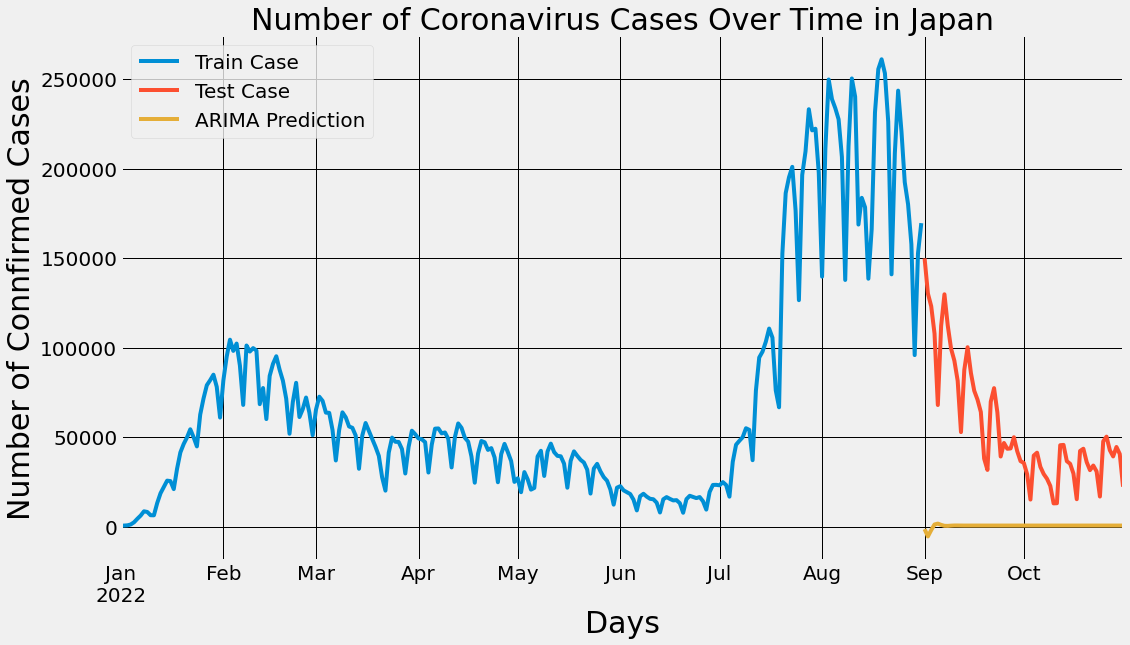

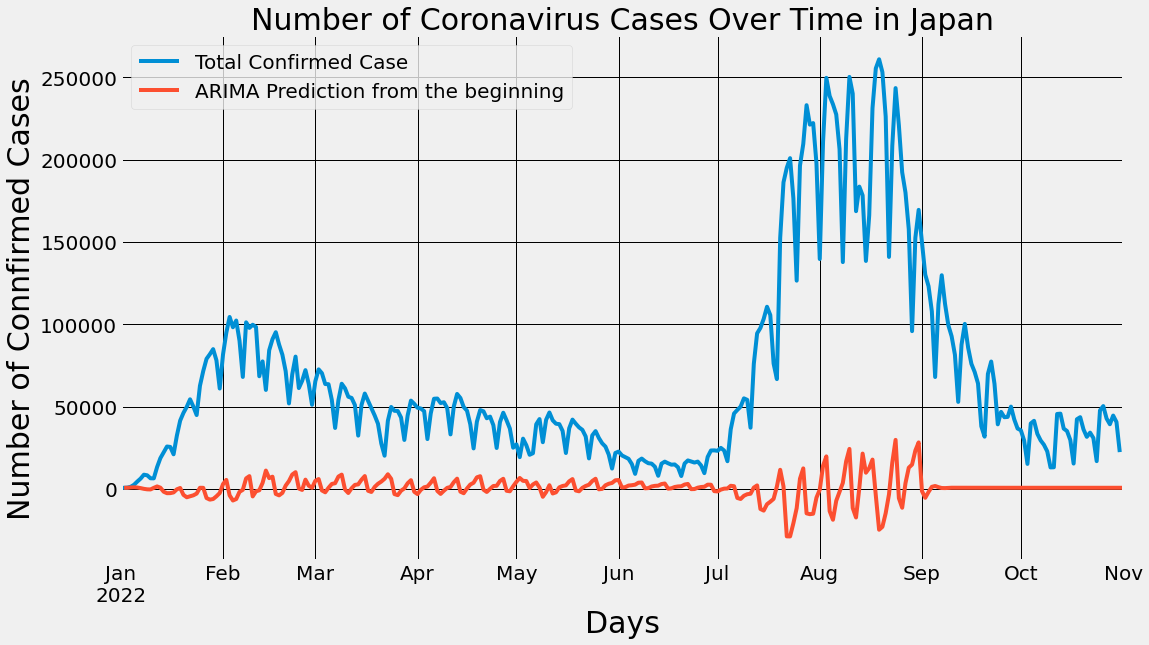

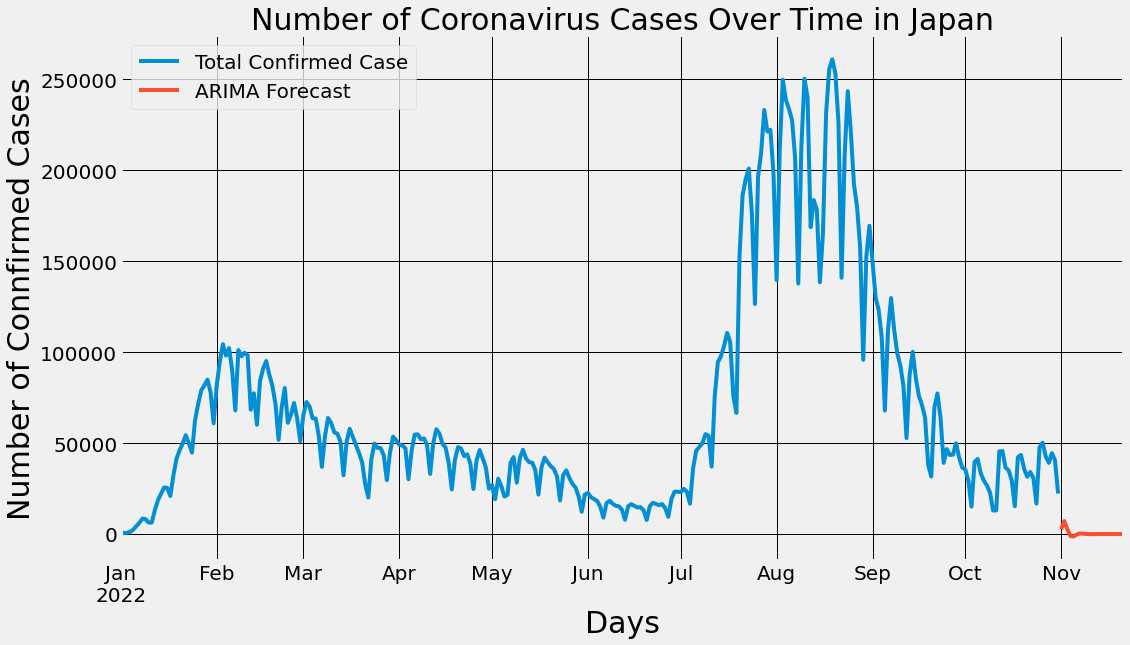

In [32]:
 testcase,predtest_japan,predfuture_japan=Confirem(dfconfirmJapan,'Number of Coronavirus Cases Over Time in Japan',2,1,1)

In [33]:
 testcase

Confirmed
Date                 
2022-09-01     149836
2022-09-02     130182
2022-09-03     123112
2022-09-04     107819
2022-09-05      67962
...               ...
2022-10-27      42737
2022-10-28      39254
2022-10-29      44523
2022-10-30      40611
2022-10-31      22341

[61 rows x 1 columns]

In [34]:
predtest_japan

Date  predict
0  2022-09-01     1326
1  2022-09-02     5425
2  2022-09-03     1867
3  2022-09-04     1246
4  2022-09-05     1748
..        ...      ...
56 2022-10-27      659
57 2022-10-28      659
58 2022-10-29      659
59 2022-10-30      659
60 2022-10-31      659

[61 rows x 2 columns]

In [35]:
predfuture_japan

Date  Future predict
0  2022-11-01          2726.0
1  2022-11-02          7230.0
2  2022-11-03          2646.0
3  2022-11-04           974.0
4  2022-11-05          1226.0
5  2022-11-06           186.0
6  2022-11-07           388.0
7  2022-11-08           328.0
8  2022-11-09           116.0
9  2022-11-10            34.0
10 2022-11-11            63.0
11 2022-11-12           103.0
12 2022-11-13           113.0
13 2022-11-14           105.0
14 2022-11-15            98.0
15 2022-11-16            97.0
16 2022-11-17            99.0
17 2022-11-18           100.0
18 2022-11-19           100.0
19 2022-11-20           100.0
20 2022-11-21            99.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

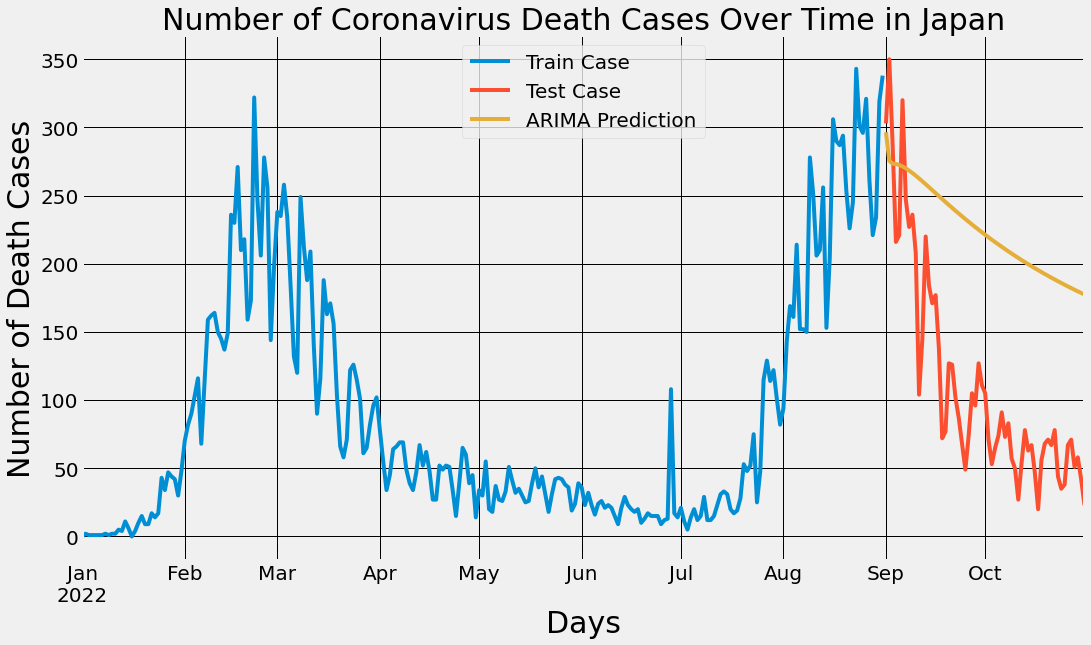

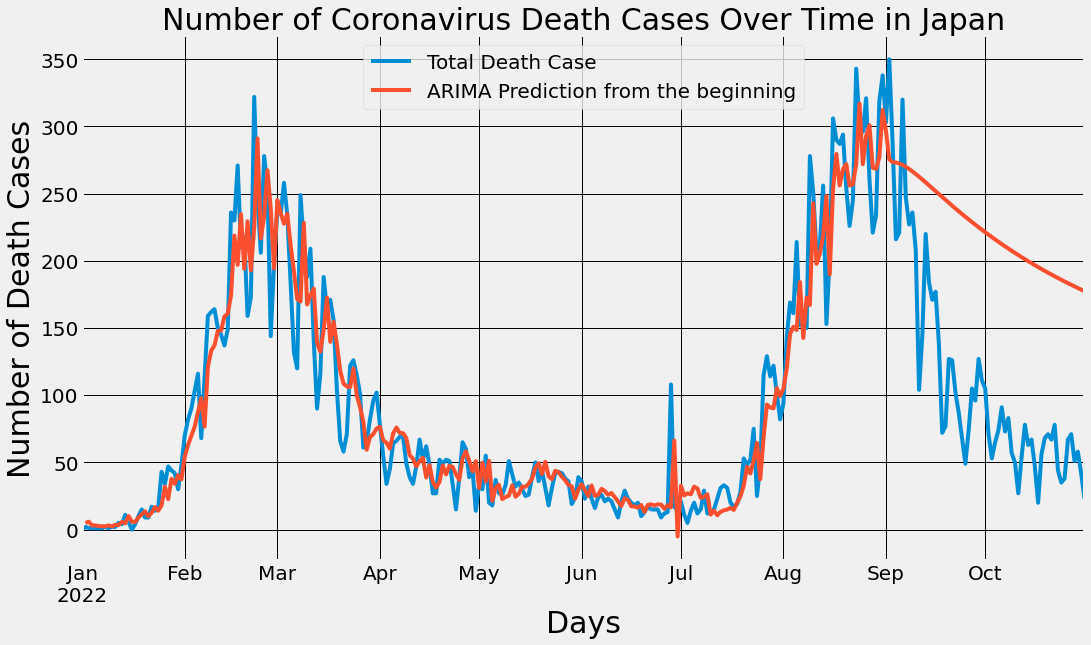

MAE: 117.60458861842778
MSE: 15723.29505182943
RMSE: 125.39256378202589
R2 Score: -1.518305476646332


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

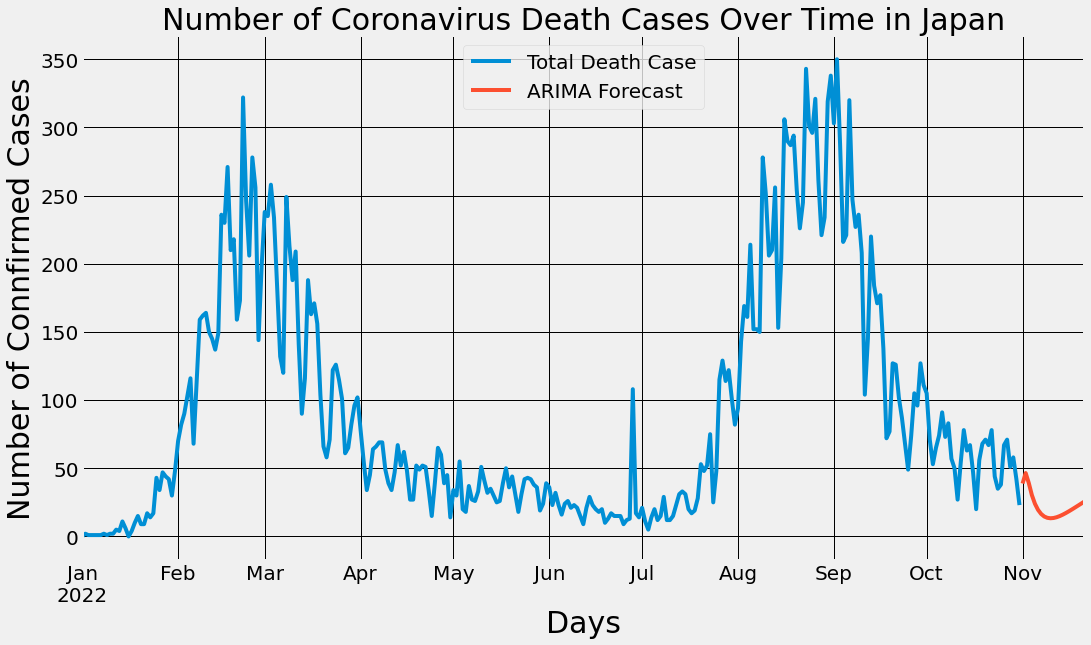

In [36]:
 testcase,predtest_japan,predfuture_japan=Death(dfDeathJapan,'Number of Coronavirus Death Cases Over Time in Japan',2,0,4)

In [37]:
 testcase

Death
Date             
2022-09-01    303
2022-09-02    350
2022-09-03    288
2022-09-04    216
2022-09-05    221
...           ...
2022-10-27     71
2022-10-28     51
2022-10-29     58
2022-10-30     42
2022-10-31     23

[61 rows x 1 columns]

In [38]:
predtest_japan

Date  predict
0  2022-09-01      296
1  2022-09-02      276
2  2022-09-03      273
3  2022-09-04      273
4  2022-09-05      272
..        ...      ...
56 2022-10-27      182
57 2022-10-28      181
58 2022-10-29      180
59 2022-10-30      179
60 2022-10-31      177

[61 rows x 2 columns]

In [39]:
predfuture_japan

Date  Future predict
0  2022-11-01              39
1  2022-11-02              46
2  2022-11-03              39
3  2022-11-04              30
4  2022-11-05              24
5  2022-11-06              19
6  2022-11-07              16
7  2022-11-08              15
8  2022-11-09              14
9  2022-11-10              13
10 2022-11-11              14
11 2022-11-12              14
12 2022-11-13              15
13 2022-11-14              16
14 2022-11-15              17
15 2022-11-16              18
16 2022-11-17              20
17 2022-11-18              21
18 2022-11-19              23
19 2022-11-20              24
20 2022-11-21              26

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

MAE: 37824.571695336446
MSE: 2425908485.2076035
 RMSE: 49253.51241492939
 R2 Score: -1.4327479161156709
f MAE: 103048.42497123817
f MSE: 25245588559.190765
f RMSE: 158888.60424583874
f R2 Score: -1.5157076809186454


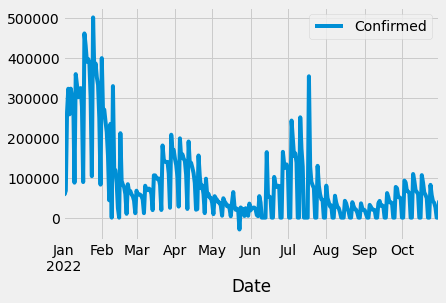

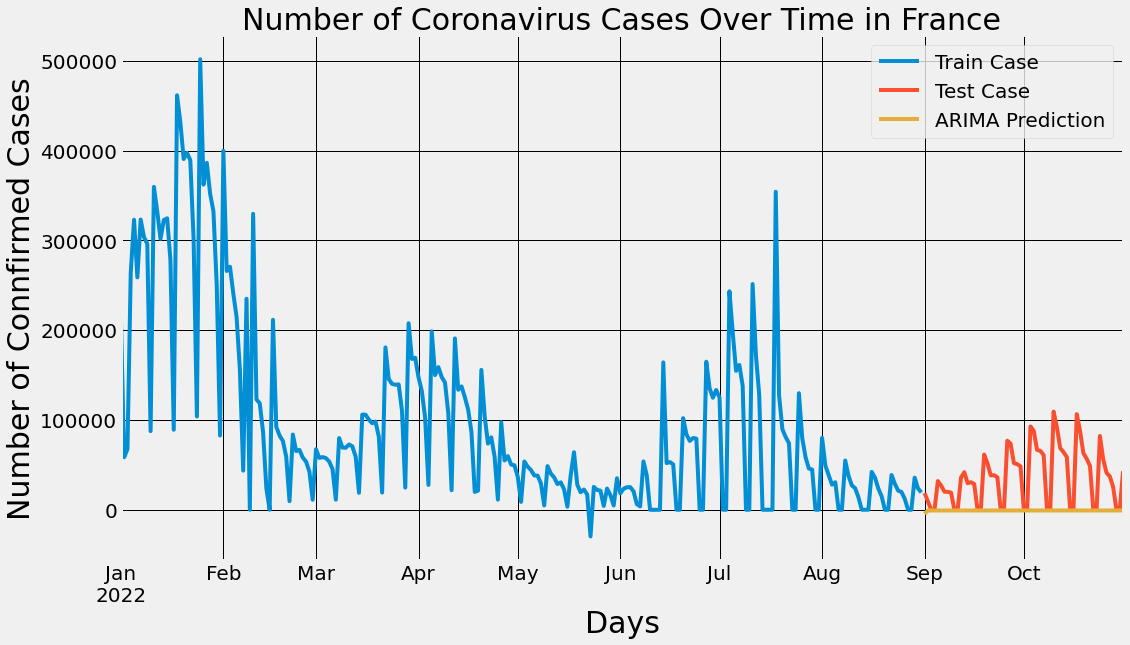

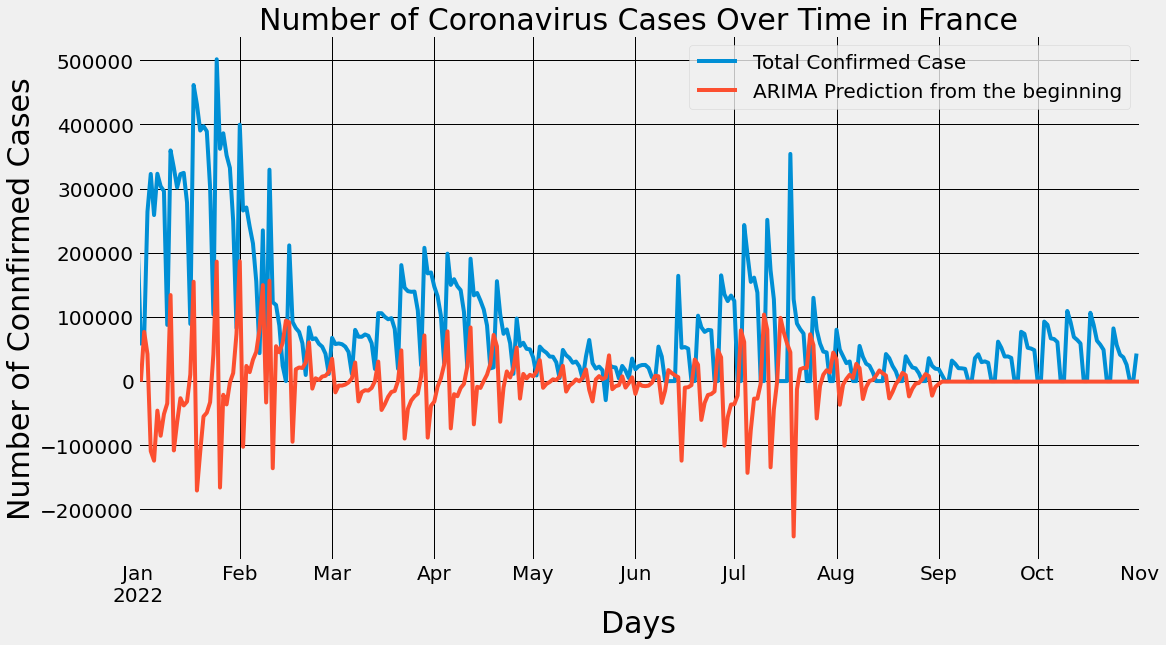

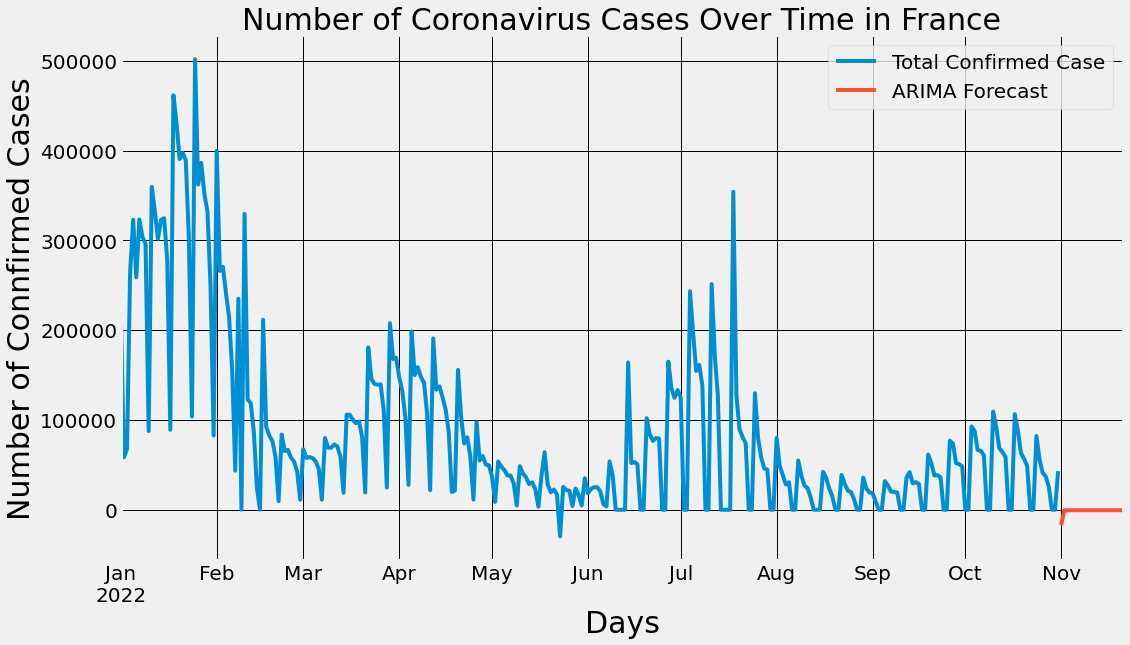

In [40]:
 testcase,predtest_france,predfuture_france=Confirem(dfconfirmFrance,'Number of Coronavirus Cases Over Time in France',0,1,1)

In [41]:
 testcase

Confirmed
Date                 
2022-09-01      18646
2022-09-02       9145
2022-09-03          0
2022-09-04          0
2022-09-05      31934
...               ...
2022-10-27      37089
2022-10-28      25415
2022-10-29          0
2022-10-30          0
2022-10-31      42947

[61 rows x 1 columns]

In [42]:
predtest_france


Date  predict
0  2022-09-01     4484
1  2022-09-02      826
2  2022-09-03      826
3  2022-09-04      826
4  2022-09-05      826
..        ...      ...
56 2022-10-27      826
57 2022-10-28      826
58 2022-10-29      826
59 2022-10-30      826
60 2022-10-31      826

[61 rows x 2 columns]

In [43]:
predfuture_france

Date  Future predict
0  2022-11-01         17020.0
1  2022-11-02           581.0
2  2022-11-03           581.0
3  2022-11-04           581.0
4  2022-11-05           581.0
5  2022-11-06           581.0
6  2022-11-07           581.0
7  2022-11-08           581.0
8  2022-11-09           581.0
9  2022-11-10           581.0
10 2022-11-11           581.0
11 2022-11-12           581.0
12 2022-11-13           581.0
13 2022-11-14           581.0
14 2022-11-15           581.0
15 2022-11-16           581.0
16 2022-11-17           581.0
17 2022-11-18           581.0
18 2022-11-19           581.0
19 2022-11-20           581.0
20 2022-11-21           581.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

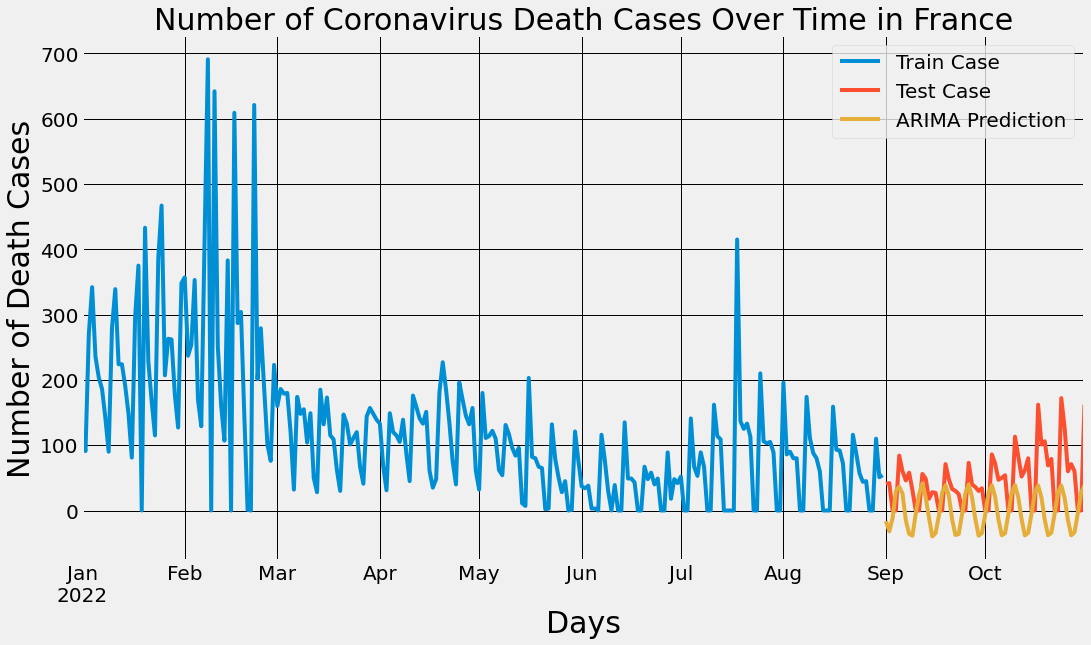

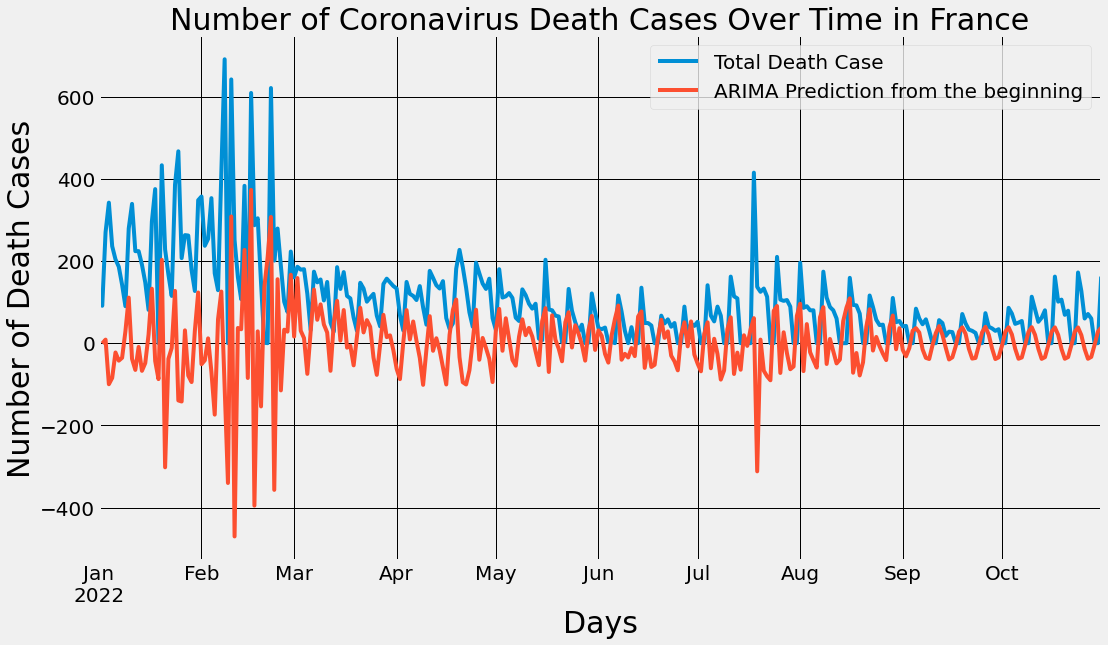

MAE: 54.91204663453718
MSE: 4337.020107095385
RMSE: 65.85605596371062
R2 Score: -1.3466211872983798


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

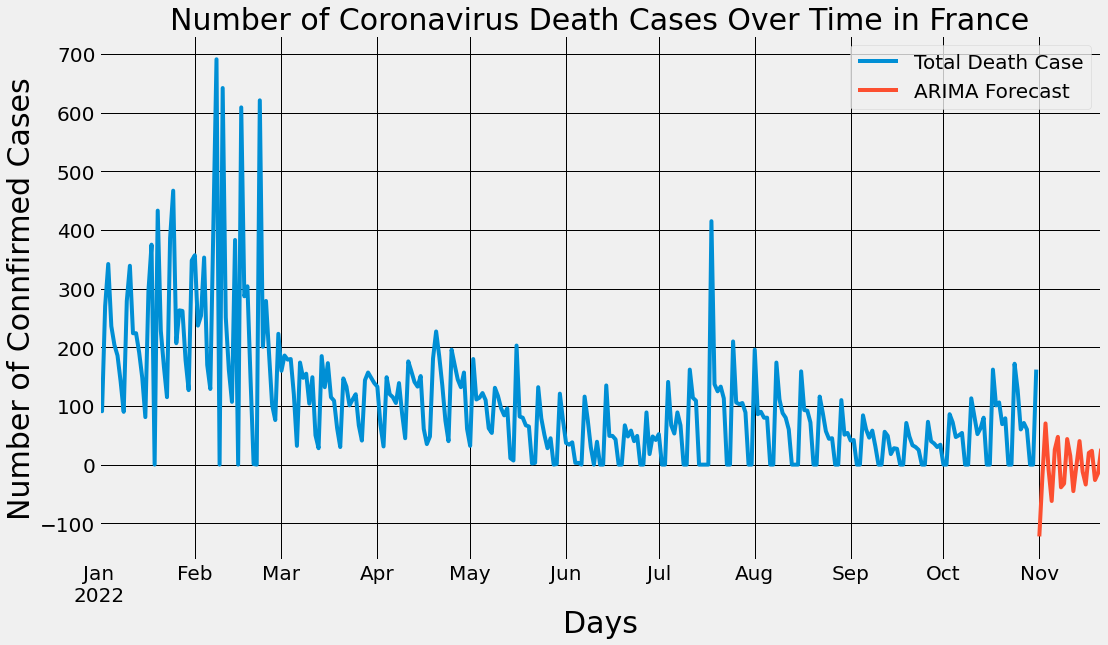

In [44]:
 testcase,predtest_france,predfuture_france=Death(dfDeathFrance,'Number of Coronavirus Death Cases Over Time in France',3,1,4)

In [45]:
 testcase

Death
Date             
2022-09-01     41
2022-09-02     42
2022-09-03      0
2022-09-04      0
2022-09-05     84
...           ...
2022-10-27     71
2022-10-28     60
2022-10-29      0
2022-10-30      0
2022-10-31    162

[61 rows x 1 columns]

In [46]:
predtest_france

Date  predict
0  2022-09-01       16
1  2022-09-02       32
2  2022-09-03       12
3  2022-09-04       30
4  2022-09-05       36
..        ...      ...
56 2022-10-27       38
57 2022-10-28       33
58 2022-10-29        4
59 2022-10-30       28
60 2022-10-31       38

[61 rows x 2 columns]

In [47]:
predfuture_france

Date  Future predict
0  2022-11-01             122
1  2022-11-02              20
2  2022-11-03              70
3  2022-11-04               9
4  2022-11-05              62
5  2022-11-06              26
6  2022-11-07              47
7  2022-11-08              39
8  2022-11-09              32
9  2022-11-10              44
10 2022-11-11              15
11 2022-11-12              45
12 2022-11-13               1
13 2022-11-14              40
14 2022-11-15              12
15 2022-11-16              34
16 2022-11-17              20
17 2022-11-18              24
18 2022-11-19              26
19 2022-11-20              15
20 2022-11-21              27

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

MAE: 59200.98820309257
MSE: 5761269632.6513
 RMSE: 75903.02782268505
 R2 Score: -1.2444734153432178
f MAE: 115074.39403443514
f MSE: 22955041094.48117
f RMSE: 151509.21125291745
f R2 Score: -2.4493459918345852


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

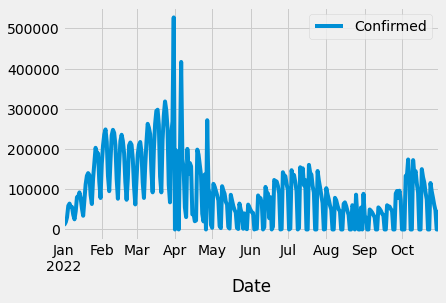

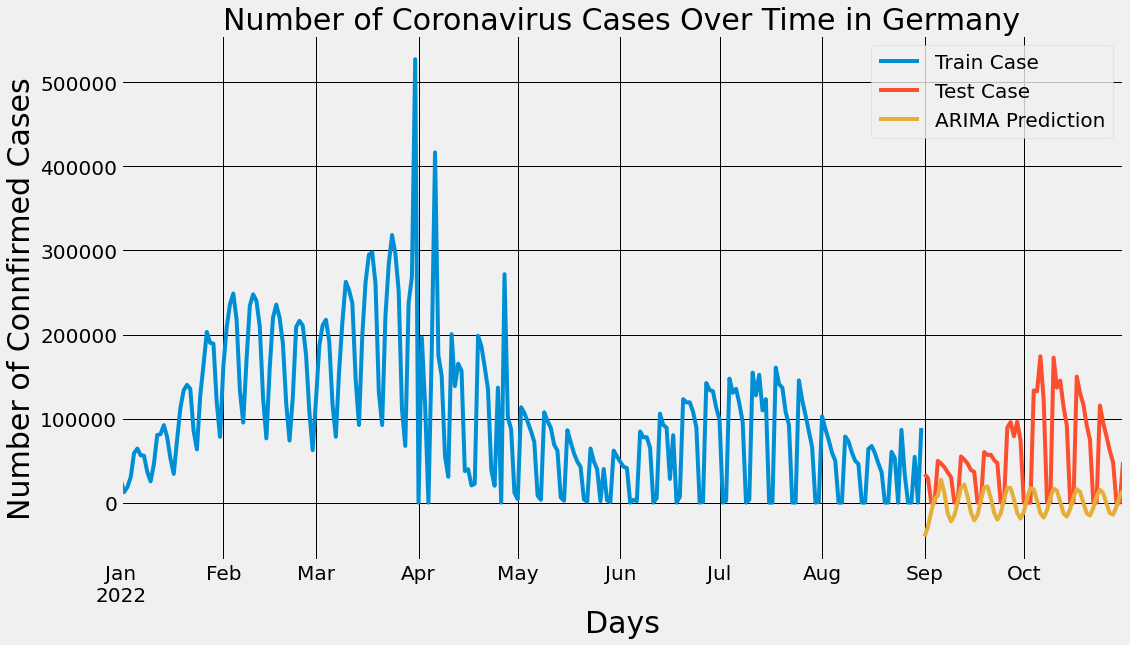

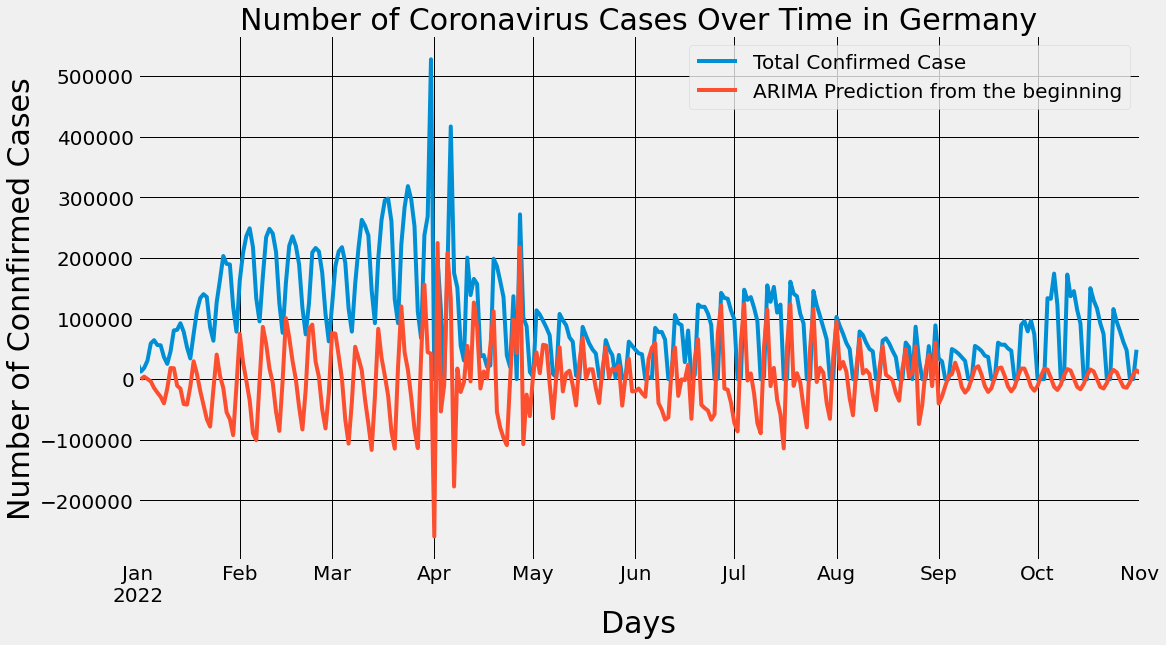

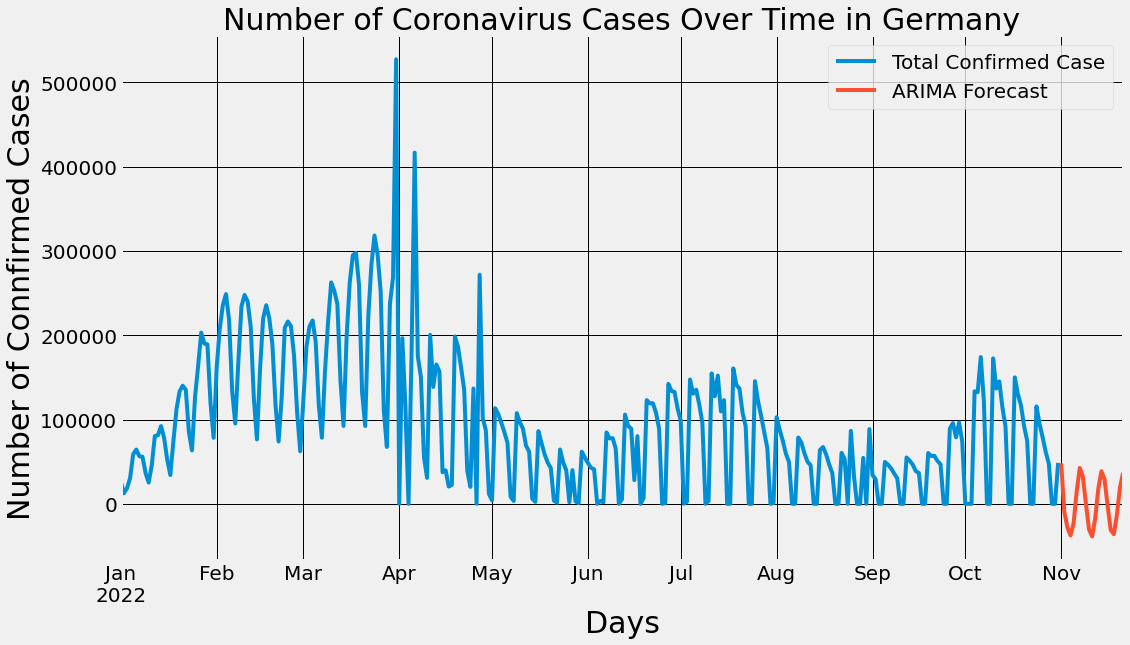

In [48]:
 testcase,predtest_Germany,predfuture_Germany=Confirem(dfconfirmGermany,'Number of Coronavirus Cases Over Time in Germany',5,1,2)

In [49]:
 testcase

Confirmed
Date                 
2022-09-01      33930
2022-09-02      29345
2022-09-03          0
2022-09-04          0
2022-09-05      49709
...               ...
2022-10-27      61492
2022-10-28      47718
2022-10-29          0
2022-10-30          1
2022-10-31      48556

[61 rows x 1 columns]

In [50]:
predtest_Germany


Date  predict
0  2022-09-01    40221
1  2022-09-02    28693
2  2022-09-03    11104
3  2022-09-04     4590
4  2022-09-05     8190
..        ...      ...
56 2022-10-27    12631
57 2022-10-28    14224
58 2022-10-29     4950
59 2022-10-30     7932
60 2022-10-31    14535

[61 rows x 2 columns]

In [51]:
predfuture_Germany

Date  Future predict
0  2022-11-01         48041.0
1  2022-11-02          9364.0
2  2022-11-03         27863.0
3  2022-11-04         37525.0
4  2022-11-05         23410.0
5  2022-11-06         14550.0
6  2022-11-07         42578.0
7  2022-11-08         32352.0
8  2022-11-09            35.0
9  2022-11-10         30463.0
10 2022-11-11         38723.0
11 2022-11-12         17303.0
12 2022-11-13         18062.0
13 2022-11-14         38607.0
14 2022-11-15         29105.0
15 2022-11-16          2026.0
16 2022-11-17         31066.0
17 2022-11-18         36055.0
18 2022-11-19         13254.0
19 2022-11-20         19404.0
20 2022-11-21         36677.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

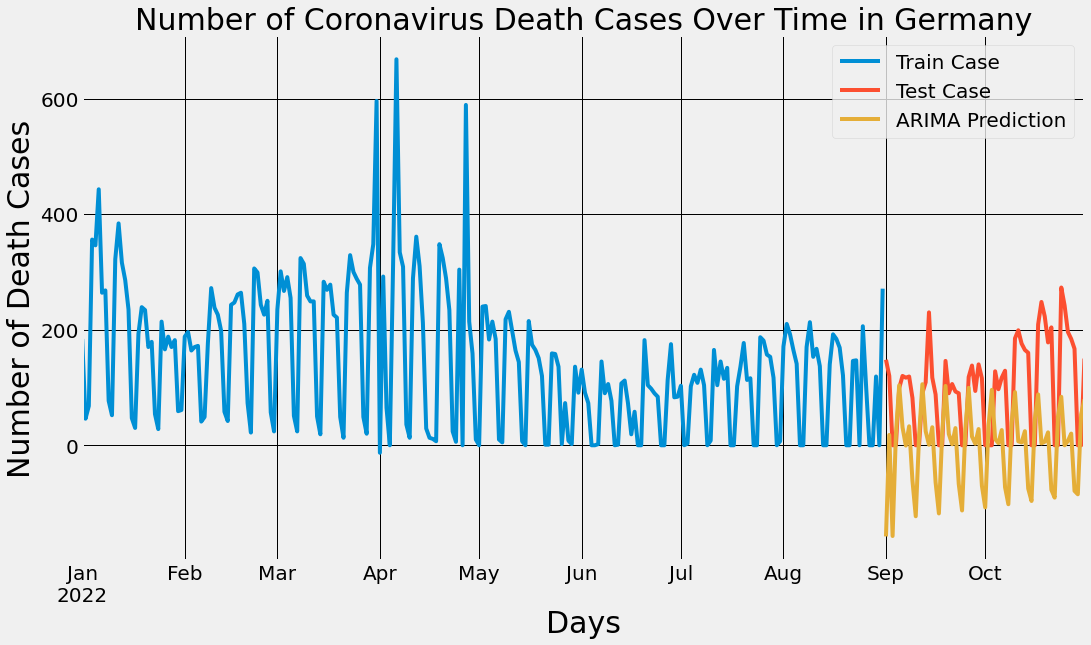

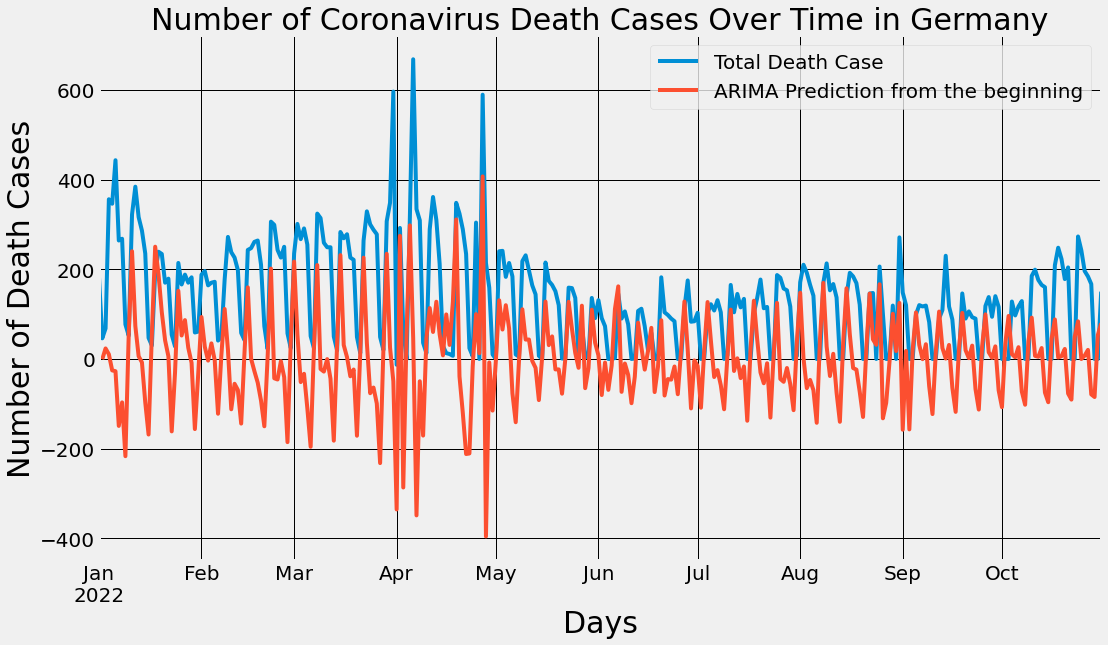

MAE: 118.5581987867991
MSE: 19072.72374554956
RMSE: 138.1040323290727
R2 Score: -1.9892395646102181


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

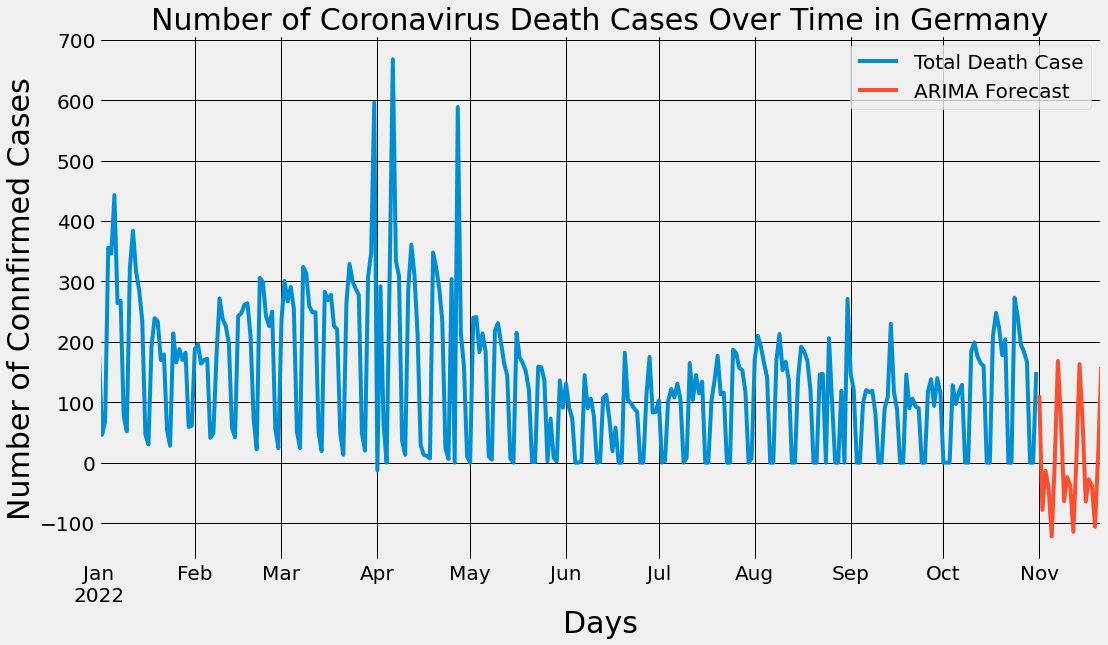

In [52]:
 testcase,predtest_Germany,predfuture_Germany=Death(dfDeathGermany,'Number of Coronavirus Death Cases Over Time in Germany',5,1,5)

In [53]:
 testcase

Death
Date             
2022-09-01    148
2022-09-02    120
2022-09-03      0
2022-09-04      0
2022-09-05     99
...           ...
2022-10-27    184
2022-10-28    167
2022-10-29      0
2022-10-30      0
2022-10-31    150

[61 rows x 1 columns]

In [54]:
predtest_Germany

Date  predict
0  2022-09-01      158
1  2022-09-02       18
2  2022-09-03      157
3  2022-09-04       19
4  2022-09-05      104
..        ...      ...
56 2022-10-27       20
57 2022-10-28       79
58 2022-10-29       85
59 2022-10-30       54
60 2022-10-31       80

[61 rows x 2 columns]

In [55]:
predfuture_Germany

Date  Future predict
0  2022-11-01             111
1  2022-11-02              78
2  2022-11-03              14
3  2022-11-04              41
4  2022-11-05             122
5  2022-11-06               3
6  2022-11-07             168
7  2022-11-08              70
8  2022-11-09              64
9  2022-11-10              24
10 2022-11-11              38
11 2022-11-12             115
12 2022-11-13               7
13 2022-11-14             163
14 2022-11-15              67
15 2022-11-16              64
16 2022-11-17              28
17 2022-11-18              38
18 2022-11-19             106
19 2022-11-20              11
20 2022-11-21             158

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

MAE: 27731.80081930478
MSE: 984727428.1840827
 RMSE: 31380.366922394052
 R2 Score: -3.5603164166106476
f MAE: 58022.728293770495
f MSE: 6283110259.591556
f RMSE: 79266.0725631815
f R2 Score: -2.0131378228200387


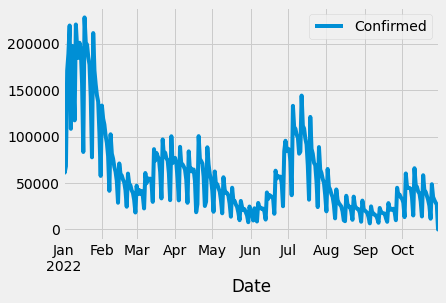

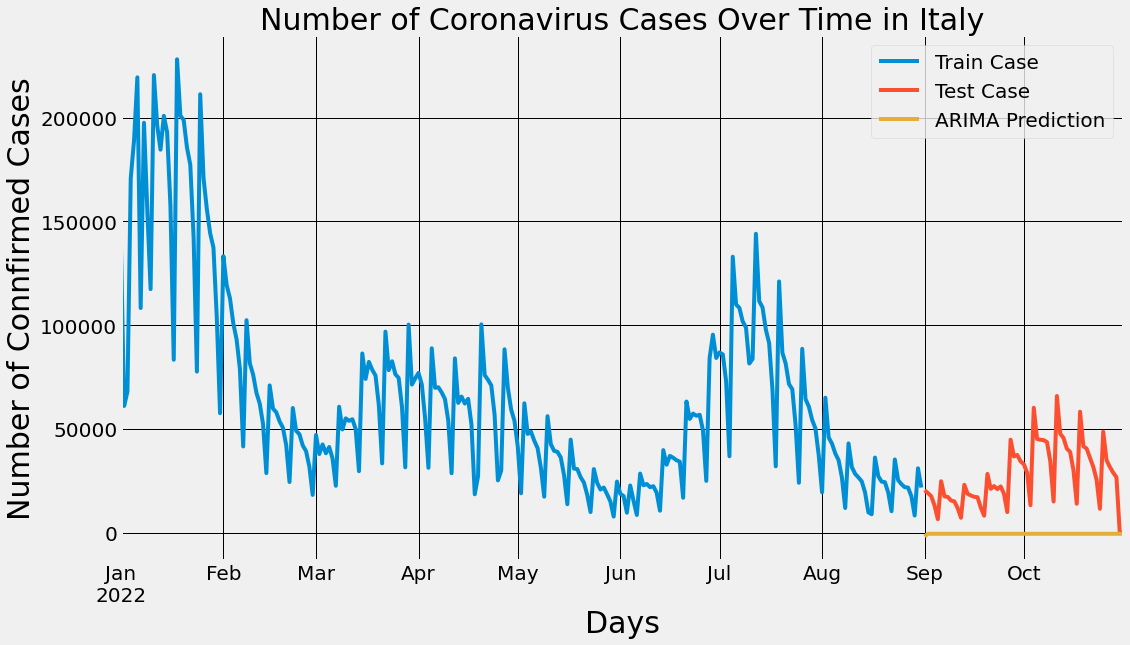

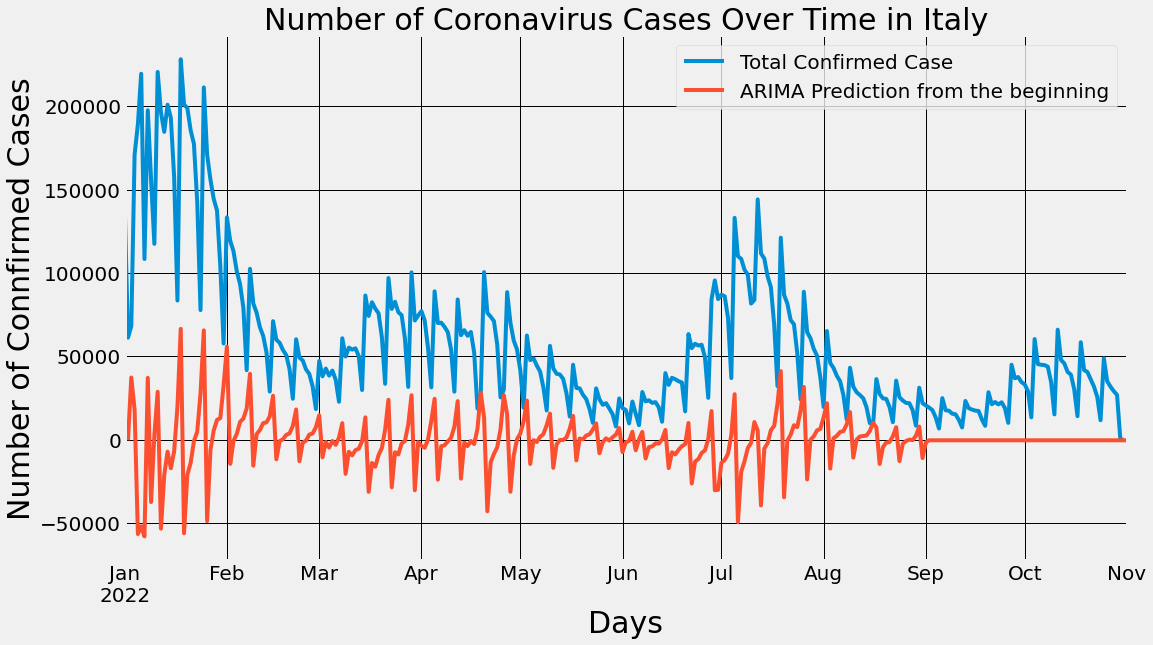

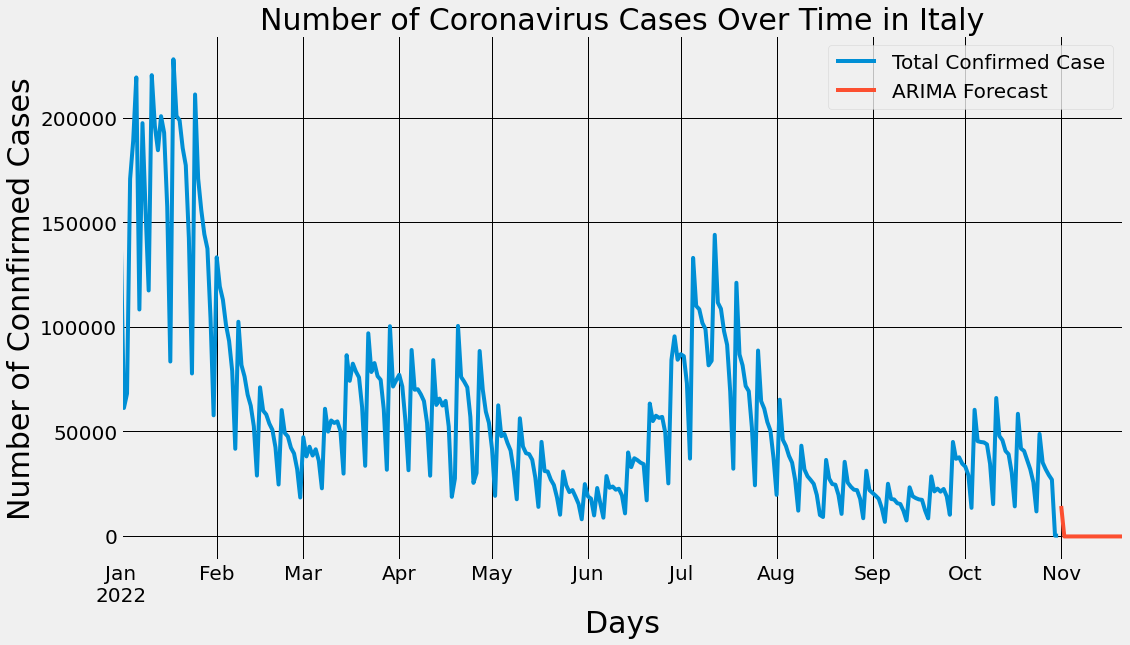

In [56]:
 testcase,predtest,predfuture=Confirem(dfconfirmItaly,'Number of Coronavirus Cases Over Time in Italy',0,1,1)

In [57]:
 testcase

Confirmed
Date                 
2022-09-01      20498
2022-09-02      19158
2022-09-03      17660
2022-09-04      13196
2022-09-05       6608
...               ...
2022-10-27      31758
2022-10-28      29037
2022-10-29      26799
2022-10-30          0
2022-10-31          0

[61 rows x 1 columns]

In [58]:
predtest


Date  predict
0  2022-09-01     1734
1  2022-09-02      444
2  2022-09-03      444
3  2022-09-04      444
4  2022-09-05      444
..        ...      ...
56 2022-10-27      444
57 2022-10-28      444
58 2022-10-29      444
59 2022-10-30      444
60 2022-10-31      444

[61 rows x 2 columns]

In [59]:
predfuture

Date  Future predict
0  2022-11-01         14201.0
1  2022-11-02           376.0
2  2022-11-03           376.0
3  2022-11-04           376.0
4  2022-11-05           376.0
5  2022-11-06           376.0
6  2022-11-07           376.0
7  2022-11-08           376.0
8  2022-11-09           376.0
9  2022-11-10           376.0
10 2022-11-11           376.0
11 2022-11-12           376.0
12 2022-11-13           376.0
13 2022-11-14           376.0
14 2022-11-15           376.0
15 2022-11-16           376.0
16 2022-11-17           376.0
17 2022-11-18           376.0
18 2022-11-19           376.0
19 2022-11-20           376.0
20 2022-11-21           376.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

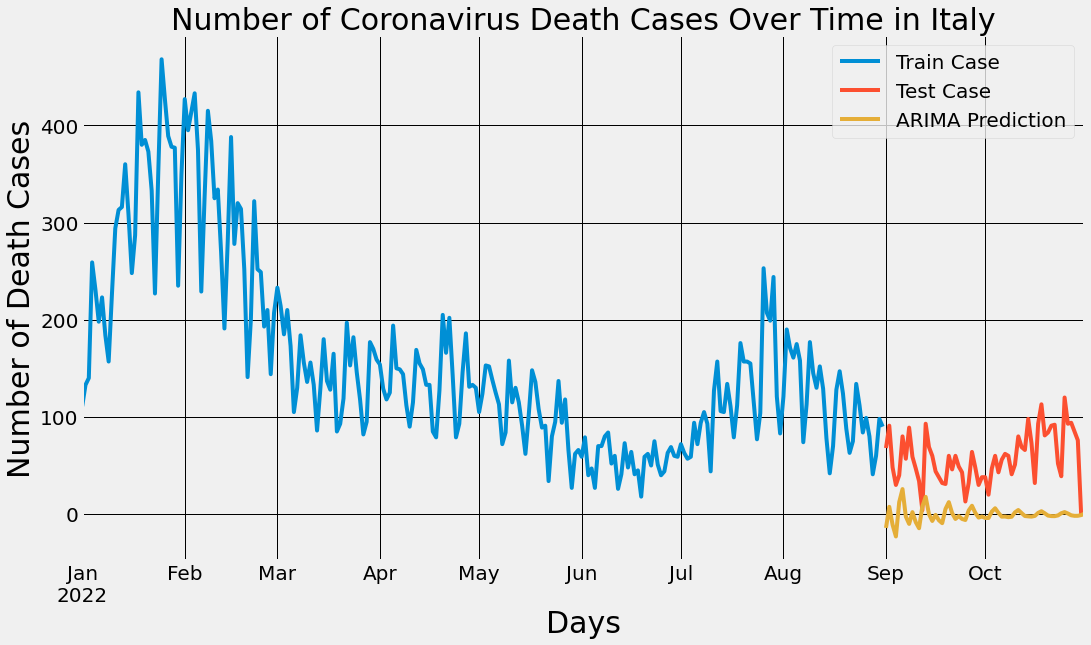

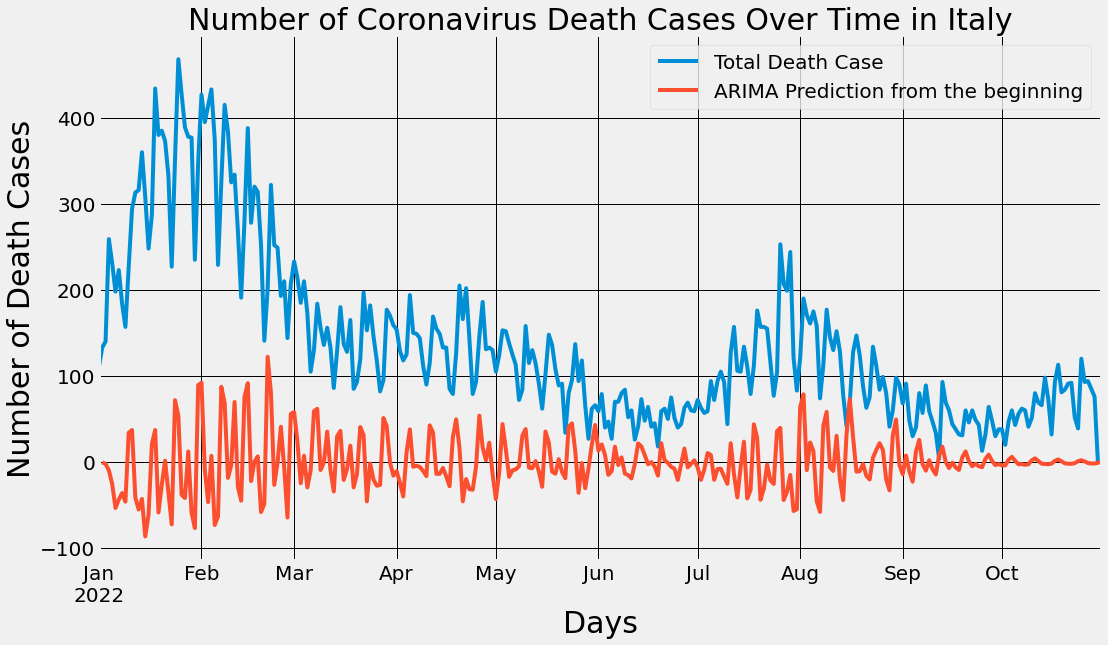

MAE: 58.26471060748195
MSE: 4056.5854766030643
RMSE: 63.6913296815435
R2 Score: -4.722854239184834


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

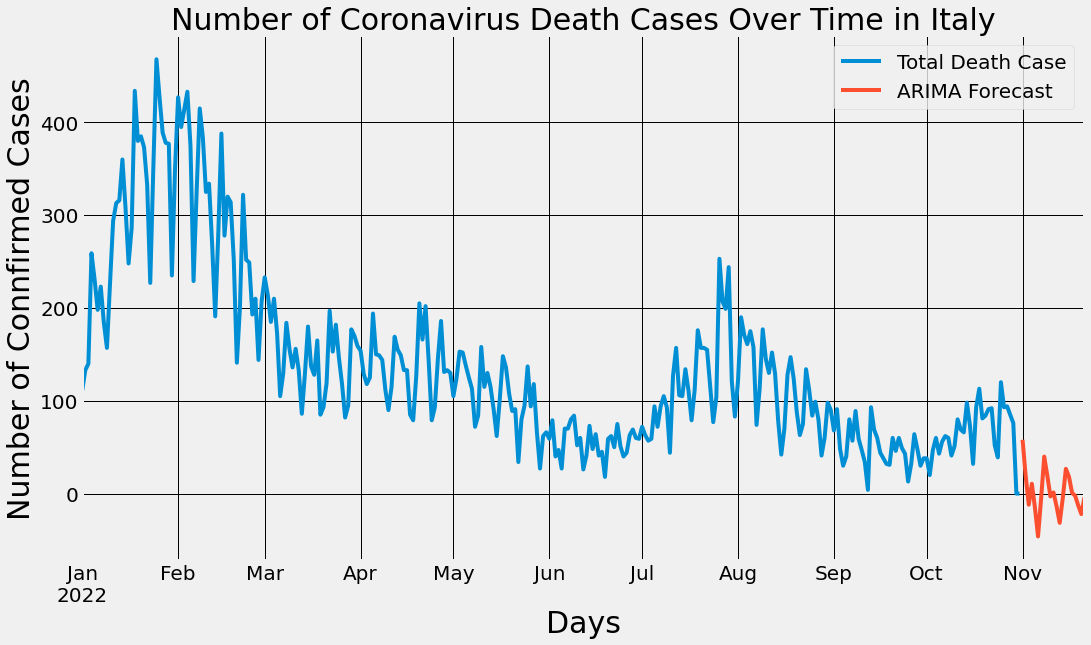

In [60]:
 testcase,predtest,predfuture=Death(dfDeathItaly,'Number of Coronavirus Death Cases Over Time in Italy',5,1,2)

In [61]:
 testcase

Death
Date             
2022-09-01     68
2022-09-02     91
2022-09-03     48
2022-09-04     30
2022-09-05     40
...           ...
2022-10-27     94
2022-10-28     85
2022-10-29     76
2022-10-30      0
2022-10-31      0

[61 rows x 1 columns]

In [62]:
predtest

Date  predict
0  2022-09-01       14
1  2022-09-02        8
2  2022-09-03       11
3  2022-09-04       23
4  2022-09-05       12
..        ...      ...
56 2022-10-27        1
57 2022-10-28        2
58 2022-10-29        2
59 2022-10-30        1
60 2022-10-31        1

[61 rows x 2 columns]

In [63]:
predfuture

Date  Future predict
0  2022-11-01              58
1  2022-11-02              19
2  2022-11-03              12
3  2022-11-04              11
4  2022-11-05              15
5  2022-11-06              46
6  2022-11-07               5
7  2022-11-08              40
8  2022-11-09              19
9  2022-11-10               3
10 2022-11-11               1
11 2022-11-12              14
12 2022-11-13              32
13 2022-11-14               5
14 2022-11-15              27
15 2022-11-16              18
16 2022-11-17               1
17 2022-11-18               2
18 2022-11-19              13
19 2022-11-20              22
20 2022-11-21               4

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

MAE: 2223.5373459583784
MSE: 22625101.970772002
 RMSE: 4756.585116527613
 R2 Score: -0.24907602363786263
f MAE: 6763.880114502087
f MSE: 128994524.40232912
f RMSE: 11357.575639295963
f R2 Score: -1.7862568235724288


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

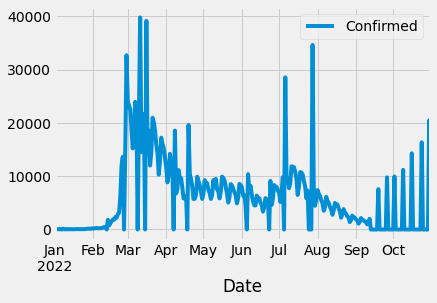

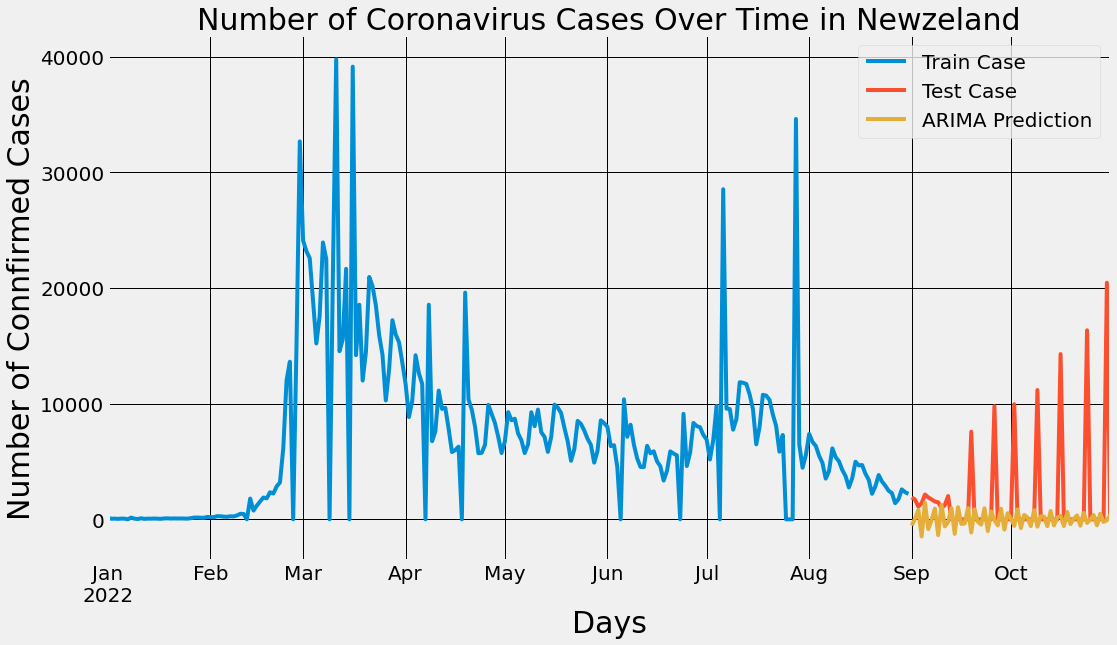

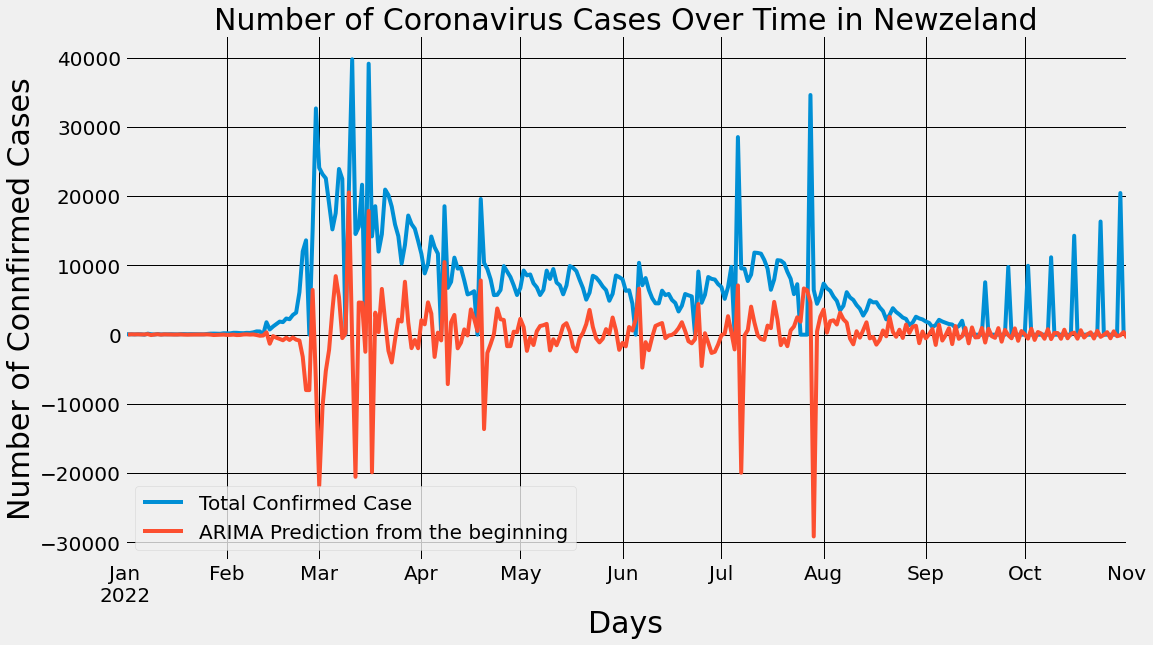

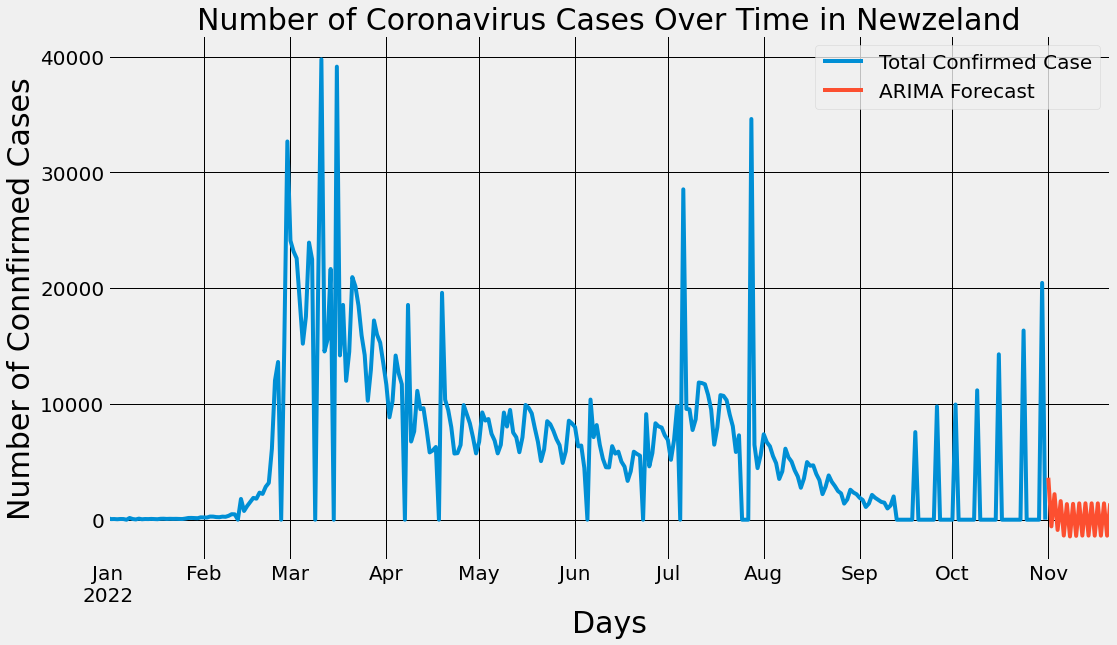

In [64]:
 testcase,predtest,predfuture=Confirem(dfconfirmNewzeland,'Number of Coronavirus Cases Over Time in Newzeland',3,1,4)

In [65]:
 testcase

Confirmed
Date                 
2022-09-01       1895
2022-09-02       1703
2022-09-03       1099
2022-09-04       1400
2022-09-05       2145
...               ...
2022-10-27          0
2022-10-28          0
2022-10-29          0
2022-10-30      20456
2022-10-31          0

[61 rows x 1 columns]

In [66]:
predtest


Date  predict
0  2022-09-01      532
1  2022-09-02       60
2  2022-09-03      817
3  2022-09-04     1480
4  2022-09-05     1427
..        ...      ...
56 2022-10-27      520
57 2022-10-28      484
58 2022-10-29      227
59 2022-10-30       86
60 2022-10-31      378

[61 rows x 2 columns]

In [67]:
predfuture

Date  Future predict
0  2022-11-01          3625.0
1  2022-11-02           577.0
2  2022-11-03          2207.0
3  2022-11-04           886.0
4  2022-11-05          1606.0
5  2022-11-06          1370.0
6  2022-11-07          1349.0
7  2022-11-08          1445.0
8  2022-11-09          1370.0
9  2022-11-10          1396.0
10 2022-11-11          1411.0
11 2022-11-12          1374.0
12 2022-11-13          1419.0
13 2022-11-14          1375.0
14 2022-11-15          1415.0
15 2022-11-16          1378.0
16 2022-11-17          1413.0
17 2022-11-18          1379.0
18 2022-11-19          1413.0
19 2022-11-20          1379.0
20 2022-11-21          1413.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

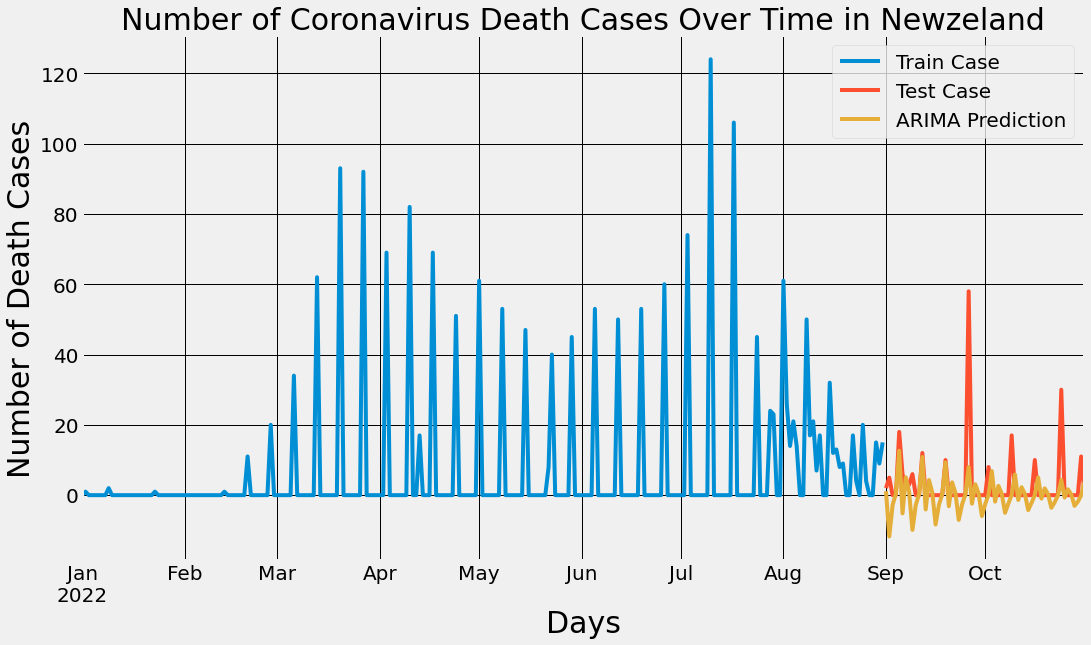

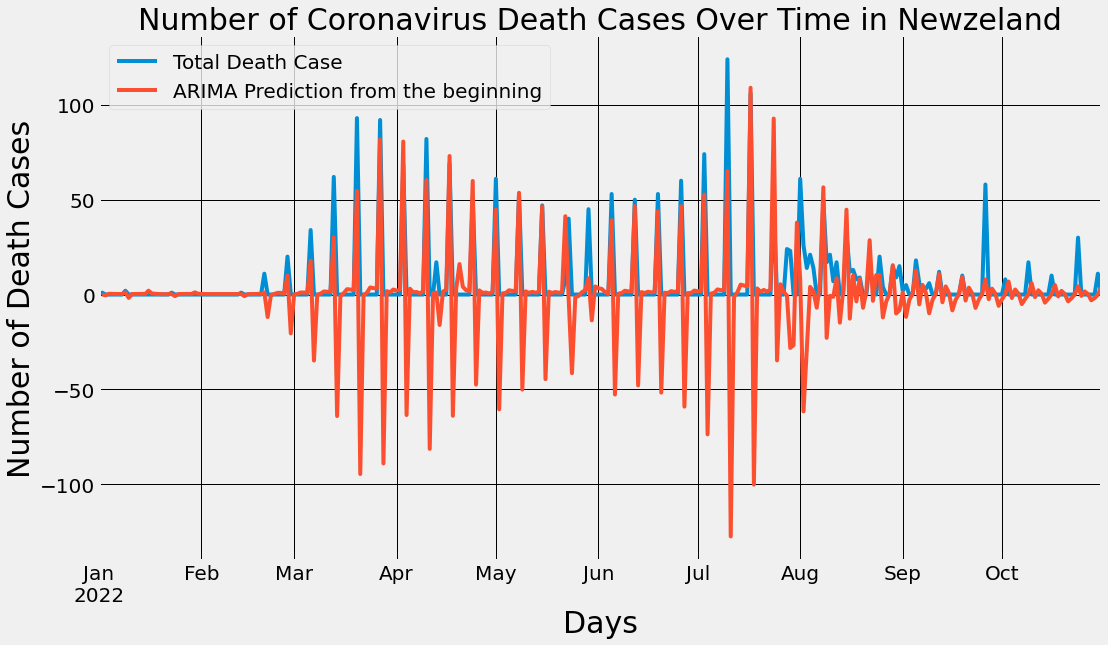

MAE: 4.882030493149504
MSE: 80.83743951077369
RMSE: 8.990964325964912
R2 Score: -0.011024995024096151


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

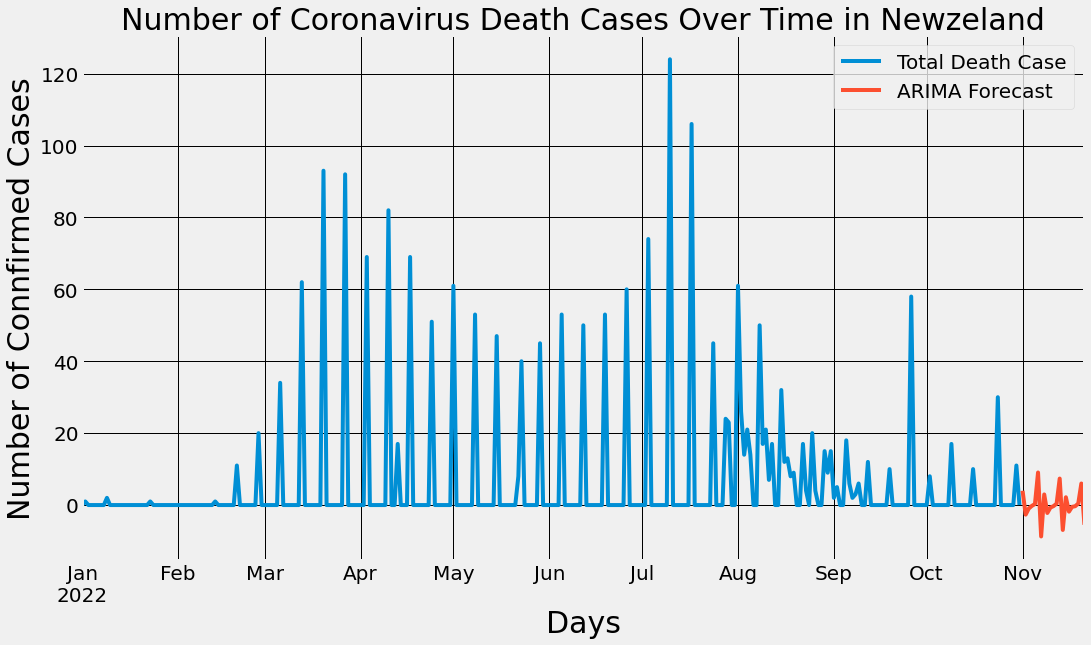

In [68]:
 testcase,predtest,predfuture=Death(dfDeathNewzeland,'Number of Coronavirus Death Cases Over Time in Newzeland',6,1,5)

In [69]:
 testcase

Death
Date             
2022-09-01      2
2022-09-02      5
2022-09-03      0
2022-09-04      0
2022-09-05     18
...           ...
2022-10-27      0
2022-10-28      0
2022-10-29      0
2022-10-30     11
2022-10-31      0

[61 rows x 1 columns]

In [70]:
predtest

Date  predict
0  2022-09-01        1
1  2022-09-02       12
2  2022-09-03        3
3  2022-09-04        0
4  2022-09-05       13
..        ...      ...
56 2022-10-27        0
57 2022-10-28        3
58 2022-10-29        2
59 2022-10-30        0
60 2022-10-31        4

[61 rows x 2 columns]

In [71]:
predfuture

Date  Future predict
0  2022-11-01               4
1  2022-11-02               3
2  2022-11-03               1
3  2022-11-04               0
4  2022-11-05               0
5  2022-11-06               9
6  2022-11-07               9
7  2022-11-08               3
8  2022-11-09               2
9  2022-11-10               1
10 2022-11-11               0
11 2022-11-12               0
12 2022-11-13               7
13 2022-11-14               7
14 2022-11-15               2
15 2022-11-16               2
16 2022-11-17               0
17 2022-11-18               0
18 2022-11-19               0
19 2022-11-20               6
20 2022-11-21               5

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

MAE: 96.37959938255091
MSE: 60815.00511559097
 RMSE: 246.60698513138465
 R2 Score: -0.22884080415089358
f MAE: 945.9853118663528
f MSE: 3811142.588202344
f RMSE: 1952.2147904885733
f R2 Score: -0.28838213367233245


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

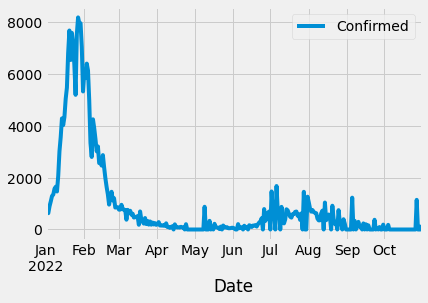

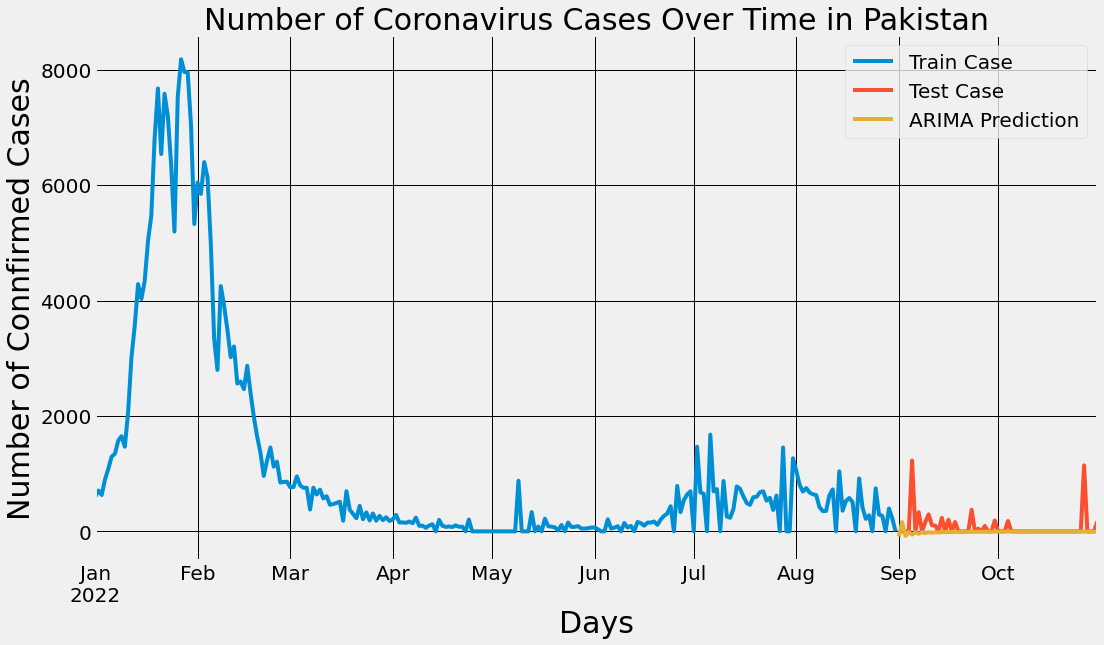

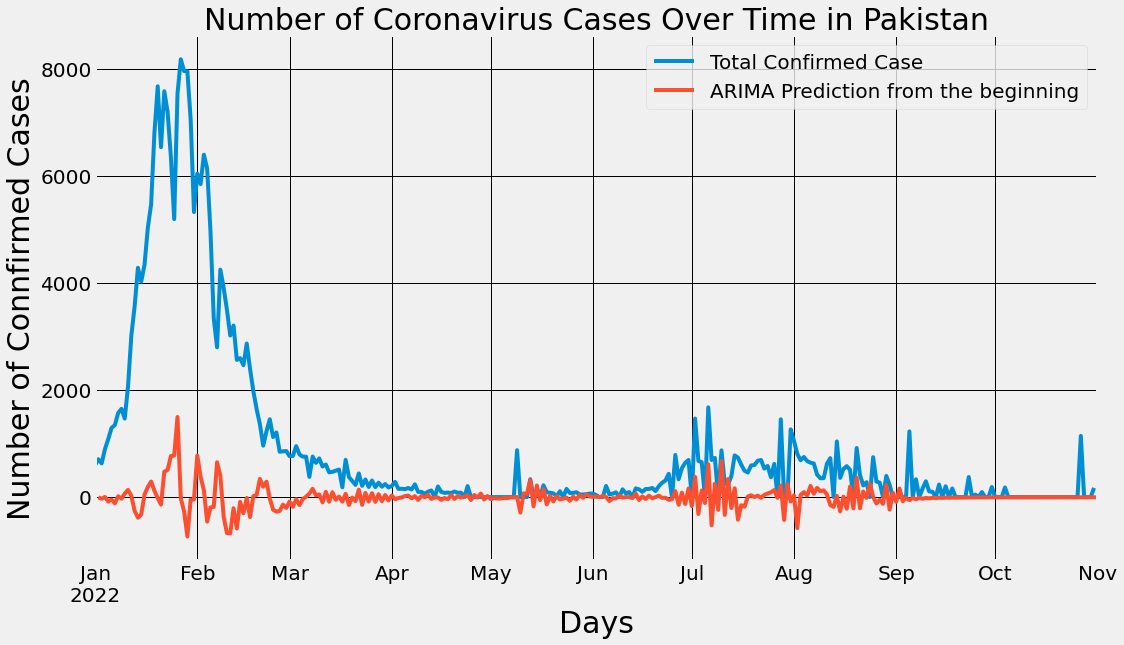

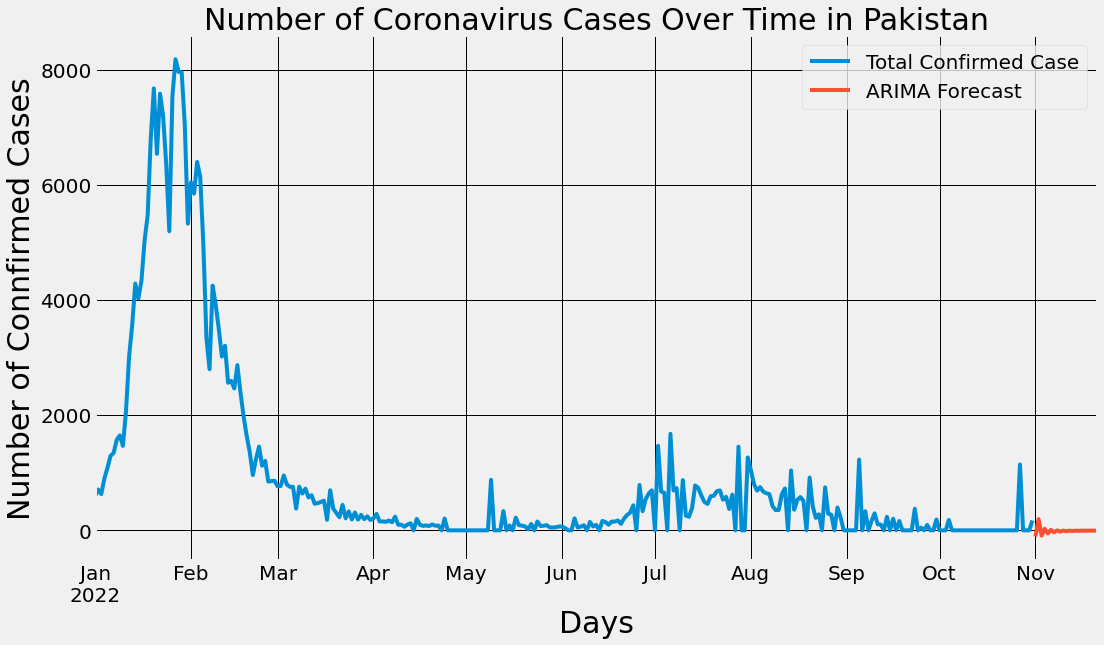

In [72]:
 testcase,predtest,predfuture=Confirem(dfconfirmPakistan,'Number of Coronavirus Cases Over Time in Pakistan',2,1,4)

In [73]:
 testcase

Confirmed
Date                 
2022-09-01          0
2022-09-02          0
2022-09-03          0
2022-09-04          0
2022-09-05       1228
...               ...
2022-10-27       1144
2022-10-28          0
2022-10-29          0
2022-10-30          0
2022-10-31        172

[61 rows x 1 columns]

In [74]:
predtest


Date  predict
0  2022-09-01       88
1  2022-09-02      161
2  2022-09-03       78
3  2022-09-04       15
4  2022-09-05       57
..        ...      ...
56 2022-10-27        4
57 2022-10-28        4
58 2022-10-29        4
59 2022-10-30        4
60 2022-10-31        4

[61 rows x 2 columns]

In [75]:
predfuture

Date  Future predict
0  2022-11-01           106.0
1  2022-11-02           195.0
2  2022-11-03            92.0
3  2022-11-04            26.0
4  2022-11-05            55.0
5  2022-11-06             8.0
6  2022-11-07            34.0
7  2022-11-08             1.0
8  2022-11-09            22.0
9  2022-11-10             4.0
10 2022-11-11            15.0
11 2022-11-12             6.0
12 2022-11-13            11.0
13 2022-11-14             6.0
14 2022-11-15             8.0
15 2022-11-16             5.0
16 2022-11-17             7.0
17 2022-11-18             5.0
18 2022-11-19             5.0
19 2022-11-20             5.0
20 2022-11-21             5.0

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

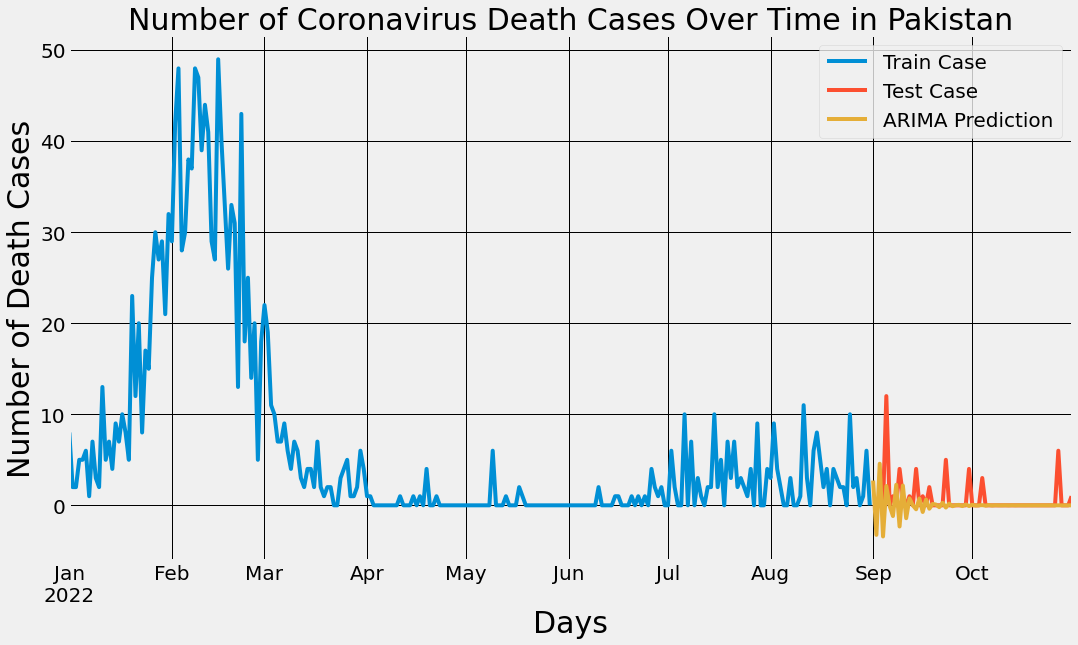

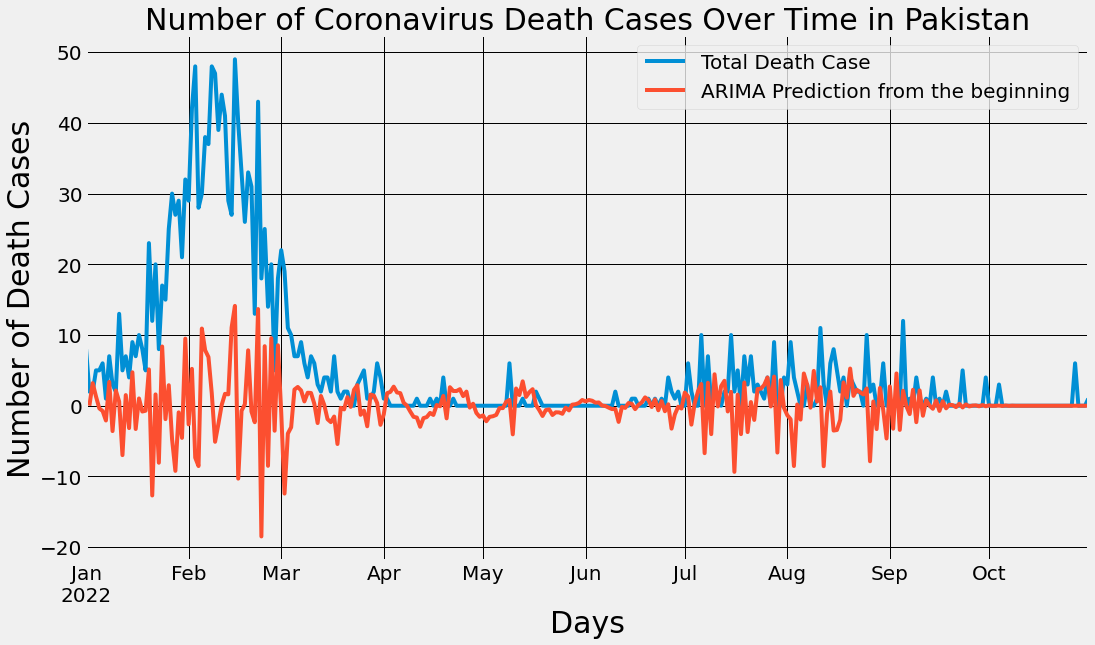

MAE: 1.118346939041482
MSE: 5.260491116112646
RMSE: 2.293576054137435
R2 Score: -0.3493924888360096


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be use

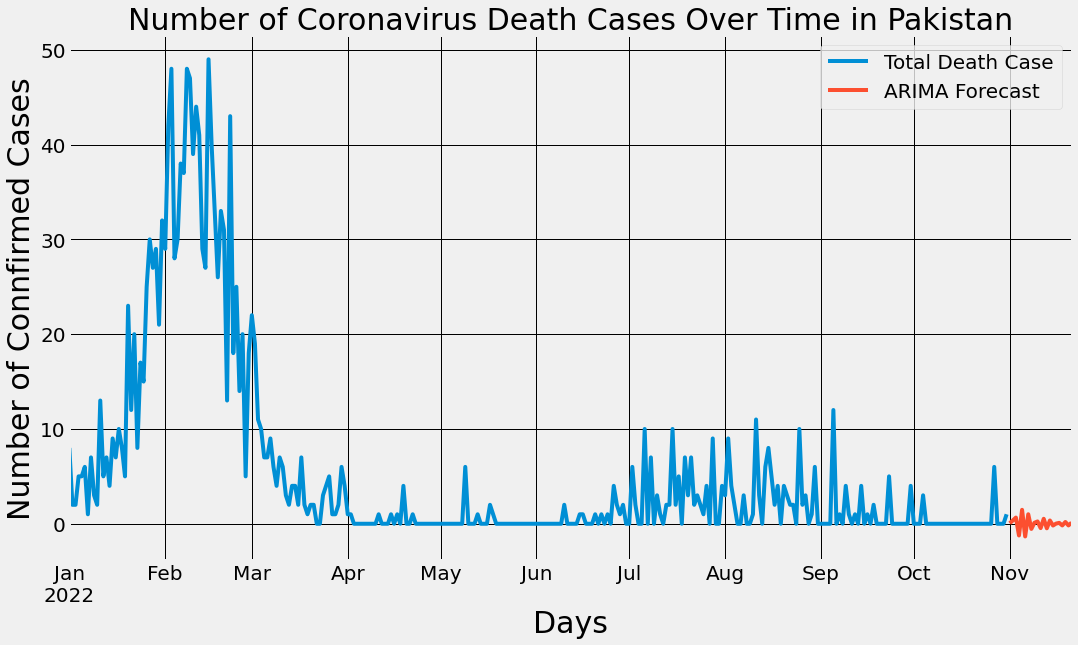

In [76]:
 testcase,predtest,predfuture=Death(dfDeathPakistan,'Number of Coronavirus Death Cases Over Time in Pakistan',4,1,5)

In [77]:
 testcase

Death
Date             
2022-09-01      0
2022-09-02      0
2022-09-03      0
2022-09-04      0
2022-09-05     12
...           ...
2022-10-27      6
2022-10-28      0
2022-10-29      0
2022-10-30      0
2022-10-31      1

[61 rows x 1 columns]

In [78]:
predtest

Date  predict
0  2022-09-01        3
1  2022-09-02        3
2  2022-09-03        5
3  2022-09-04        3
4  2022-09-05        2
..        ...      ...
56 2022-10-27        0
57 2022-10-28        0
58 2022-10-29        0
59 2022-10-30        0
60 2022-10-31        0

[61 rows x 2 columns]

In [79]:
predfuture

Date  Future predict
0  2022-11-01               0
1  2022-11-02               0
2  2022-11-03               1
3  2022-11-04               1
4  2022-11-05               1
5  2022-11-06               1
6  2022-11-07               1
7  2022-11-08               1
8  2022-11-09               0
9  2022-11-10               0
10 2022-11-11               0
11 2022-11-12               1
12 2022-11-13               0
13 2022-11-14               0
14 2022-11-15               0
15 2022-11-16               0
16 2022-11-17               0
17 2022-11-18               0
18 2022-11-19               0
19 2022-11-20               0
20 2022-11-21               0

**Complete code above**


**Find P, Q, D for cinfirmed Cases**

In [80]:
!pip install pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 7.3 MB/s 
     |████████████████████████████████| 9.9 MB 29.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [81]:
swt=auto_arima(dfconfirmIndia['Confirmed'],trace= True)
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=6664.294, Time=0.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6720.116, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6682.670, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6681.120, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6718.146, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6665.029, Time=0.39 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6681.853, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6659.732, Time=0.33 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6653.388, Time=0.46 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6669.071, Time=0.23 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=6671.445, Time=0.33 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6684.585, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=6669.667, Time=0.15 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=6657.379, Time=0.65 sec
 ARIMA(3,1,1)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  320
Model:               SARIMAX(3, 1, 1)   Log Likelihood               -3320.189
Date:                Mon, 05 Dec 2022   AIC                           6650.378
Time:                        04:53:14   BIC                           6669.204
Sample:                    01-01-2022   HQIC                          6657.897
                         - 11-16-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0174      0.042     23.943      0.000       0.934       1.101
ar.L2         -0.3281      0.042     -7.776      0.000      -0.411      -0.245
ar.L3          0.2459      0.025      9.923      0.000       0.197       0.295
ma.L1         -0.7447      0.031    -23.691      0.000      -0.806      -0.683
sigma2      6.639e+07   2.92e-10   2.28e+17      0.000    6.64e+07    6.64e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              2191.86
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -0.60
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.92e+32. Standard errors may be unstable.
"""

In [82]:
swt=auto_arima(dfconfirmBangladesh['Confirmed'],trace= True)
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4880.671, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4914.577, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4907.573, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4905.079, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4912.579, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4906.576, Time=0.48 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4906.000, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4865.569, Time=1.03 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4903.278, Time=0.23 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=4896.374, Time=1.36 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4872.338, Time=1.17 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4855.325, Time=1.00 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4885.925, Time=0.75 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=4865.901, Time=0.52 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  320
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -2365.726
Date:                Mon, 05 Dec 2022   AIC                           4753.453
Time:                        04:53:56   BIC                           4794.870
Sample:                    01-01-2022   HQIC                          4769.993
                         - 11-16-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7424      0.079     22.031      0.000       1.587       1.897
ar.L2         -2.0551      0.149    -13.818      0.000      -2.347      -1.764
ar.L3          1.7564      0.177      9.946      0.000       1.410       2.103
ar.L4         -1.2439      0.123    -10.121      0.000      -1.485      -1.003
ar.L5          0.6202      0.061     10.183      0.000       0.501       0.740
ma.L1         -1.7741      0.114    -15.621      0.000      -1.997      -1.551
ma.L2          2.0877      0.209      9.981      0.000       1.678       2.498
ma.L3         -1.5180      0.267     -5.686      0.000      -2.041      -0.995
ma.L4          0.7665      0.196      3.908      0.000       0.382       1.151
ma.L5         -0.0816      0.105     -0.780      0.435      -0.287       0.123
sigma2      1.716e+05   6264.066     27.397      0.000    1.59e+05    1.84e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):             11418.19
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -2.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [83]:
swt=auto_arima(dfconfirmJapan['Confirmed'],trace= True)
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7175.911, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7215.419, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7217.220, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7216.878, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7213.421, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7176.988, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7174.054, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7197.979, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7185.248, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7176.044, Time=0.24 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7184.508, Time=0.08 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7177.663, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7172.076, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7195.990, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  320
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -3582.038
Date:                Mon, 05 Dec 2022   AIC                           7172.076
Time:                        04:53:59   BIC                           7187.137
Sample:                    01-01-2022   HQIC                          7178.090
                         - 11-16-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4622      0.064      7.178      0.000       0.336       0.588
ar.L2         -0.3073      0.057     -5.363      0.000      -0.420      -0.195
ma.L1         -0.5752      0.079     -7.301      0.000      -0.730      -0.421
sigma2       3.47e+08    2.5e-11   1.39e+19      0.000    3.47e+08    3.47e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               277.07
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.83   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.5e+35. Standard errors may be unstable.
"""

In [84]:
swt=auto_arima(dfconfirmFrance['Confirmed'],trace= True)
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=8043.113, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8090.177, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8027.650, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7958.680, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8088.197, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7960.041, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7965.369, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7981.435, Time=0.35 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7956.626, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7957.920, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=7957.720, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=8025.665, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=7976.687, Time=0.34 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.760 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  320
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -3976.313
Date:                Mon, 05 Dec 2022   AIC                           7956.626
Time:                        04:54:01   BIC                           7964.156
Sample:                    01-01-2022   HQIC                          7959.633
                         - 11-16-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7641      0.024    -32.300      0.000      -0.810      -0.718
sigma2      4.171e+09      1e-12   4.15e+21      0.000    4.17e+09    4.17e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):               281.58
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):               0.10   Skew:                             0.30
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [85]:
swt=auto_arima(dfconfirmGermany['Confirmed'],trace= True)
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7822.750, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8024.872, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8012.315, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7958.714, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8022.874, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7941.361, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7925.681, Time=0.25 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=7774.778, Time=0.45 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7900.921, Time=0.21 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=7718.867, Time=0.90 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=7843.453, Time=0.25 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=7703.244, Time=1.19 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=7768.989, Time=0.31 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=7706.384, Time=1.37 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  320
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -3842.602
Date:                Mon, 05 Dec 2022   AIC                           7701.205
Time:                        04:54:12   BIC                           7731.326
Sample:                    01-01-2022   HQIC                          7713.234
                         - 11-16-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1300      0.066      1.979      0.048       0.001       0.259
ar.L2         -0.4914      0.048    -10.332      0.000      -0.585      -0.398
ar.L3         -0.3762      0.044     -8.512      0.000      -0.463      -0.290
ar.L4         -0.4213      0.042    -10.110      0.000      -0.503      -0.340
ar.L5         -0.3220      0.056     -5.724      0.000      -0.432      -0.212
ma.L1         -1.1579      0.059    -19.602      0.000      -1.274      -1.042
ma.L2          0.6820      0.053     12.757      0.000       0.577       0.787
sigma2      1.899e+09   2.72e-11   6.99e+19      0.000     1.9e+09     1.9e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              1363.90
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.34   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.68e+34. Standard errors may be unstable.
"""

In [86]:
swt=auto_arima(dfconfirmItaly['Confirmed'],trace= True)
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7454.948, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7528.688, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7460.520, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7403.931, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7526.751, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7406.052, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7416.906, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7400.722, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=7402.660, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=7406.203, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7458.594, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.57 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 2.305 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  320
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -3698.361
Date:                Mon, 05 Dec 2022   AIC                           7400.722
Time:                        04:54:14   BIC                           7408.252
Sample:                    01-01-2022   HQIC                          7403.729
                         - 11-16-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7124      0.026    -27.604      0.000      -0.763      -0.662
sigma2      6.866e+08   3.23e-12   2.13e+20      0.000    6.87e+08    6.87e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):              1193.42
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.59   Skew:                             1.43
Prob(H) (two-sided):                  0.01   Kurtosis:                        12.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

In [87]:
swt=auto_arima(dfconfirmNewzeland['Confirmed'],trace= True)
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6544.802, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6454.942, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6360.815, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=6542.803, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6362.220, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6359.589, Time=0.15 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6351.907, Time=0.36 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6347.340, Time=0.56 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6350.764, Time=0.28 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=6350.046, Time=0.32 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=6349.301, Time=0.18 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=6340.626, Time=1.25 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=6

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  320
Model:               SARIMAX(3, 1, 4)   Log Likelihood               -3160.113
Date:                Mon, 05 Dec 2022   AIC                           6336.226
Time:                        04:54:34   BIC                           6366.347
Sample:                    01-01-2022   HQIC                          6348.255
                         - 11-16-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.9965      0.080     24.914      0.000       1.839       2.154
ar.L2         -1.8941      0.103    -18.394      0.000      -2.096      -1.692
ar.L3          0.7123      0.077      9.266      0.000       0.562       0.863
ma.L1         -2.9611      0.068    -43.322      0.000      -3.095      -2.827
ma.L2          3.8584      0.148     25.990      0.000       3.567       4.149
ma.L3         -2.5526      0.136    -18.737      0.000      -2.820      -2.286
ma.L4          0.7071      0.048     14.795      0.000       0.613       0.801
sigma2      2.599e+07   3.86e-09   6.73e+15      0.000     2.6e+07     2.6e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):              1882.09
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             1.75
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.06e+31. Standard errors may be unstable.
"""

In [88]:
swt=auto_arima(dfconfirmPakistan['Confirmed'],trace= True)
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4767.816, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4791.451, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4769.683, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4768.031, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4789.459, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4767.314, Time=0.35 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4770.025, Time=0.24 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4770.023, Time=0.26 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4765.733, Time=0.35 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4771.834, Time=0.12 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4761.750, Time=1.05 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=4733.078, Time=1.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4763.984, Time=0.45 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=4733.395, Time=1.39 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  320
Model:               SARIMAX(2, 1, 4)   Log Likelihood               -2357.310
Date:                Mon, 05 Dec 2022   AIC                           4728.620
Time:                        04:54:53   BIC                           4754.976
Sample:                    01-01-2022   HQIC                          4739.145
                         - 11-16-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1546      0.101      1.526      0.127      -0.044       0.353
ar.L2          0.6276      0.102      6.158      0.000       0.428       0.827
ma.L1         -0.5339      0.100     -5.344      0.000      -0.730      -0.338
ma.L2         -0.6820      0.136     -5.031      0.000      -0.948      -0.416
ma.L3          0.1733      0.052      3.313      0.001       0.071       0.276
ma.L4          0.3573      0.034     10.457      0.000       0.290       0.424
sigma2      1.533e+05   7255.499     21.122      0.000    1.39e+05    1.67e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               525.29
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.29   Skew:                            -0.48
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Find P, Q, D for Death Cases**

In [89]:
swt=auto_arima(dfDeathIndia['Death'],trace= True)  #0 1 1
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4285.317, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4425.406, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4350.356, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4280.494, Time=0.22 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4423.409, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4282.394, Time=0.30 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4282.392, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4284.427, Time=0.69 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4278.572, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=4280.478, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4280.475, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=4348.358, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4282.458, Time=0.39 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.215 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  304
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2137.286
Date:                Mon, 05 Dec 2022   AIC                           4278.572
Time:                        04:54:56   BIC                           4285.999
Sample:                    01-01-2022   HQIC                          4281.543
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8048      0.021    -38.471      0.000      -0.846      -0.764
sigma2      7.815e+04    757.192    103.216      0.000    7.67e+04    7.96e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):            260624.74
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.00   Skew:                            10.21
Prob(H) (two-sided):                  0.00   Kurtosis:                       145.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [90]:
swt=auto_arima(dfDeathBangladesh['Death'],trace= True) #2 1 1
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1479.656, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1614.960, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1498.288, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1508.635, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1612.965, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1491.137, Time=0.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1477.920, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1490.815, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1487.459, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1479.690, Time=0.40 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1486.224, Time=0.12 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1480.054, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1475.922, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1488.818, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0]          

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  304
Model:               SARIMAX(2, 1, 1)   Log Likelihood                -733.961
Date:                Mon, 05 Dec 2022   AIC                           1475.922
Time:                        04:55:00   BIC                           1490.777
Sample:                    01-01-2022   HQIC                          1481.865
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3804      0.053    -25.832      0.000      -1.485      -1.276
ar.L2         -0.5899      0.037    -15.743      0.000      -0.663      -0.516
ma.L1          0.7615      0.069     11.072      0.000       0.627       0.896
sigma2         7.4233      0.302     24.587      0.000       6.832       8.015
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               601.30
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
swt=auto_arima(dfDeathJapan['Death'],trace= True)  #3 0 3
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2978.769, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2976.854, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2967.299, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2976.771, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2946.710, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2929.236, Time=0.41 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2938.592, Time=0.16 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=2930.668, Time=0.44 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2929.591, Time=0.27 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=2940.038, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2931.010, Time=0.55 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2927.266, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2944.733, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  304
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -1459.633
Date:                Mon, 05 Dec 2022   AIC                           2927.266
Time:                        04:55:05   BIC                           2942.121
Sample:                    01-01-2022   HQIC                          2933.209
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3388      0.098      3.441      0.001       0.146       0.532
ar.L2         -0.2781      0.054     -5.159      0.000      -0.384      -0.172
ma.L1         -0.5823      0.092     -6.335      0.000      -0.762      -0.402
sigma2       893.5805     47.386     18.858      0.000     800.706     986.455
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               155.78
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             0.29
Prob(H) (two-sided):                  0.24   Kurtosis:                         6.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [92]:
swt=auto_arima(dfDeathFrance['Death'],trace= True)  #3 1 4
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3539.206, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3778.157, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3694.330, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3577.856, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3776.158, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3575.881, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3576.293, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3567.674, Time=0.67 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3577.820, Time=0.24 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3577.714, Time=0.46 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3573.024, Time=0.49 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3568.006, Time=0.94 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=3537.616, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  304
Model:               SARIMAX(3, 1, 4)   Log Likelihood               -1749.469
Date:                Mon, 05 Dec 2022   AIC                           3514.938
Time:                        04:55:25   BIC                           3544.648
Sample:                    01-01-2022   HQIC                          3526.824
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3070      0.060      5.134      0.000       0.190       0.424
ar.L2          0.2769      0.074      3.753      0.000       0.132       0.421
ar.L3         -0.7953      0.051    -15.633      0.000      -0.895      -0.696
ma.L1         -1.3840      0.075    -18.573      0.000      -1.530      -1.238
ma.L2          0.0893      0.148      0.605      0.545      -0.200       0.379
ma.L3          1.0093      0.162      6.230      0.000       0.692       1.327
ma.L4         -0.5718      0.085     -6.765      0.000      -0.737      -0.406
sigma2      5992.1911    282.068     21.244      0.000    5439.349    6545.033
===================================================================================
Ljung-Box (L1) (Q):                   1.96   Jarque-Bera (JB):               558.87
Prob(Q):                              0.16   Prob(JB):                         0.00
Heteroskedasticity (H):               0.16   Skew:                             0.51
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
swt=auto_arima(dfDeathGermany['Death'],trace= True)
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3591.727, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3781.510, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3771.325, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3693.718, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3779.510, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3663.884, Time=0.67 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3652.952, Time=0.44 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=3555.232, Time=0.92 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=3623.955, Time=0.56 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=3502.527, Time=1.08 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=3581.357, Time=0.73 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=3458.695, Time=1.26 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=3509.382, Time=0.98 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=3457.107, Time=1.26 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  304
Model:               SARIMAX(5, 1, 5)   Log Likelihood               -1702.334
Date:                Mon, 05 Dec 2022   AIC                           3426.668
Time:                        04:55:45   BIC                           3467.519
Sample:                    01-01-2022   HQIC                          3443.012
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3902      0.095      4.127      0.000       0.205       0.576
ar.L2         -1.1069      0.079    -14.009      0.000      -1.262      -0.952
ar.L3          0.1852      0.125      1.480      0.139      -0.060       0.430
ar.L4         -0.6532      0.064    -10.264      0.000      -0.778      -0.528
ar.L5         -0.3966      0.079     -4.996      0.000      -0.552      -0.241
ma.L1         -1.4233      0.084    -16.858      0.000      -1.589      -1.258
ma.L2          1.6364      0.130     12.555      0.000       1.381       1.892
ma.L3         -1.4567      0.151     -9.626      0.000      -1.753      -1.160
ma.L4          1.1286      0.112     10.033      0.000       0.908       1.349
ma.L5         -0.4652      0.065     -7.155      0.000      -0.593      -0.338
sigma2      4683.3398    286.290     16.359      0.000    4122.222    5244.457
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               347.51
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [94]:
swt=auto_arima(dfDeathItaly['Death'],trace= True)
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3037.325, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3159.518, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3158.689, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3141.019, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3157.539, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3088.153, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3080.599, Time=0.37 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3012.061, Time=0.92 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3088.116, Time=0.54 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=3025.947, Time=1.24 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=3032.762, Time=1.24 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3028.428, Time=0.73 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=3023.066, Time=1.31 sec
 ARIMA(2,1,3)(0,0,0)[0]             : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  304
Model:               SARIMAX(2, 1, 3)   Log Likelihood               -1499.455
Date:                Mon, 05 Dec 2022   AIC                           3010.910
Time:                        04:56:00   BIC                           3033.192
Sample:                    01-01-2022   HQIC                          3019.824
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2487      0.005    277.084      0.000       1.240       1.257
ar.L2         -0.9996      0.001  -1571.575      0.000      -1.001      -0.998
ma.L1         -1.8793      0.045    -41.347      0.000      -1.968      -1.790
ma.L2          1.7590      0.062     28.302      0.000       1.637       1.881
ma.L3         -0.6309      0.043    -14.602      0.000      -0.716      -0.546
sigma2      1232.4145     89.018     13.845      0.000    1057.943    1406.886
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                25.50
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.43   Skew:                            -0.01
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [95]:
swt=auto_arima(dfDeathNewzeland['Death'],trace= True)
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2615.117, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2865.373, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2783.957, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2636.435, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2863.373, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2628.189, Time=0.68 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2628.584, Time=0.48 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=2616.621, Time=0.79 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2634.388, Time=0.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2598.619, Time=0.34 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2600.869, Time=0.45 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2579.195, Time=0.67 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=2596.739, Time=0.56 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  304
Model:               SARIMAX(3, 1, 5)   Log Likelihood               -1244.469
Date:                Mon, 05 Dec 2022   AIC                           2506.937
Time:                        04:56:21   BIC                           2540.361
Sample:                    01-01-2022   HQIC                          2520.309
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3069      0.081      3.774      0.000       0.148       0.466
ar.L2          0.1833      0.106      1.730      0.084      -0.024       0.391
ar.L3         -0.9152      0.079    -11.532      0.000      -1.071      -0.760
ma.L1         -1.6659      0.071    -23.600      0.000      -1.804      -1.528
ma.L2          0.5593      0.125      4.472      0.000       0.314       0.804
ma.L3          1.1520      0.119      9.683      0.000       0.919       1.385
ma.L4         -1.3905      0.099    -14.086      0.000      -1.584      -1.197
ma.L5          0.5094      0.051     10.038      0.000       0.410       0.609
sigma2       211.4175     13.374     15.808      0.000     185.205     237.630
===================================================================================
Ljung-Box (L1) (Q):                   0.79   Jarque-Bera (JB):               681.04
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               1.25   Skew:                             1.67
Prob(H) (two-sided):                  0.26   Kurtosis:                         9.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [96]:
swt=auto_arima(dfDeathPakistan['Death'],trace= True)
swt.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1733.679, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1857.505, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1759.698, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1733.765, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1855.511, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1678.151, Time=0.63 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1730.238, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1730.632, Time=0.10 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1730.141, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1721.128, Time=1.14 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=1729.782, Time=0.21 sec

Best model:  ARIMA(1,1,2)(0,0,0)[0] intercept
Total fit time: 4.120 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  304
Model:               SARIMAX(1, 1, 2)   Log Likelihood                -834.076
Date:                Mon, 05 Dec 2022   AIC                           1678.151
Time:                        04:56:25   BIC                           1696.720
Sample:                    01-01-2022   HQIC                          1685.580
                         - 10-31-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0007      0.023     -0.032      0.975      -0.046       0.045
ar.L1          0.8677      0.022     39.020      0.000       0.824       0.911
ma.L1         -1.8176      0.033    -54.440      0.000      -1.883      -1.752
ma.L2          0.9222      0.031     29.580      0.000       0.861       0.983
sigma2        14.2556      0.736     19.356      0.000      12.812      15.699
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):               302.36
Prob(Q):                              0.49   Prob(JB):                         0.00
Heteroskedasticity (H):               0.25   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
import itertools

In [98]:
p=range(0,8)
q=range(0,8)
d=range(0,2)

In [99]:
pqd=list(itertools.product(p,d,q))
len(pqd)

128

In [100]:
rsme=[]
order1=[]

In [101]:
for pd in pqd:
 try:
   model= ARIMA(train, order=pd).fit()
   pred= model.predict(start=len(train), end= len(df)-1)
   error=np.sqrt(mean_squared_error(test,pred))
   print(error)
   order1.append(pd)
   rsme.append(error)
 except:
    continue

In [102]:
import pandas as pd
res= pd.DataFrame(index=order1,data=rsme, columns=['lol'])

In [103]:
res.to_csv('arimabd.csv')